# Исследование объявлений о продаже квартир

Предоставлены данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.

Задача — установить параметры, влияющие на стоимость объектов недвижимости. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## План исследования

1. Изучение исходных данных:
    * Предобработка данных;
    * Заполнение пропусков;
    * Выявление аномалий.
    

2. Анализ данных - выявление нетипичных значений.

3. Рассчет дополнительных значений для анализа:
    * цена одного квадратного метра;
    * день публикации объявления;
    * месяц публикации объявления;
    * год публикации объявления;
    * тип этажа квартиры;
    * расстояние в км до центра города.


4. Определить зависимость цены от:
    * общей площади;
    * жилой площади;
    * площади кухни;
    * количество комнат;
    * типа этажа, на котором расположена квартира;
    * даты размещения (день недели, месяц, год).


5. Определить среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
6. Определить как стоимость объектов зависит от расстояния до центра города.    



## Изучение исходных данных

In [1]:
import pandas as pd
try:
    data = pd.read_csv('real_estate_data.csv', sep = '\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')


In [2]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Выявлены неверные форматы данных: 
* first_day_exposition - должна быть дата
* floors_total - может быть только целым числом, замена на int
* is_apartment - необходимо преобразовать в булево
* balcony - может быть только целым числом, замена на int
* parks_around3000 и ponds_around3000 - может быть только целым числом, замена на int

In [4]:
#для промежуточного контроля создаю переменую с длиной исходного датафрейма
initial_data_len = len(data)
initial_data_len

23699

In [5]:
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.369900e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.541549e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.088701e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.219000e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.400000e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.800000e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.630000e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


Замечены аномальные значения:
* общая площать(total_area) - возможно это доля в квартире;
* жилая площадь(living_area) - 2м невозможно ни для квартиры, ни для комнаты;
* высота потолков(ceiling_height) - 1 и 100м;
* количество этажей(floors_total) - 60. Реально, но маловероятно;
    

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

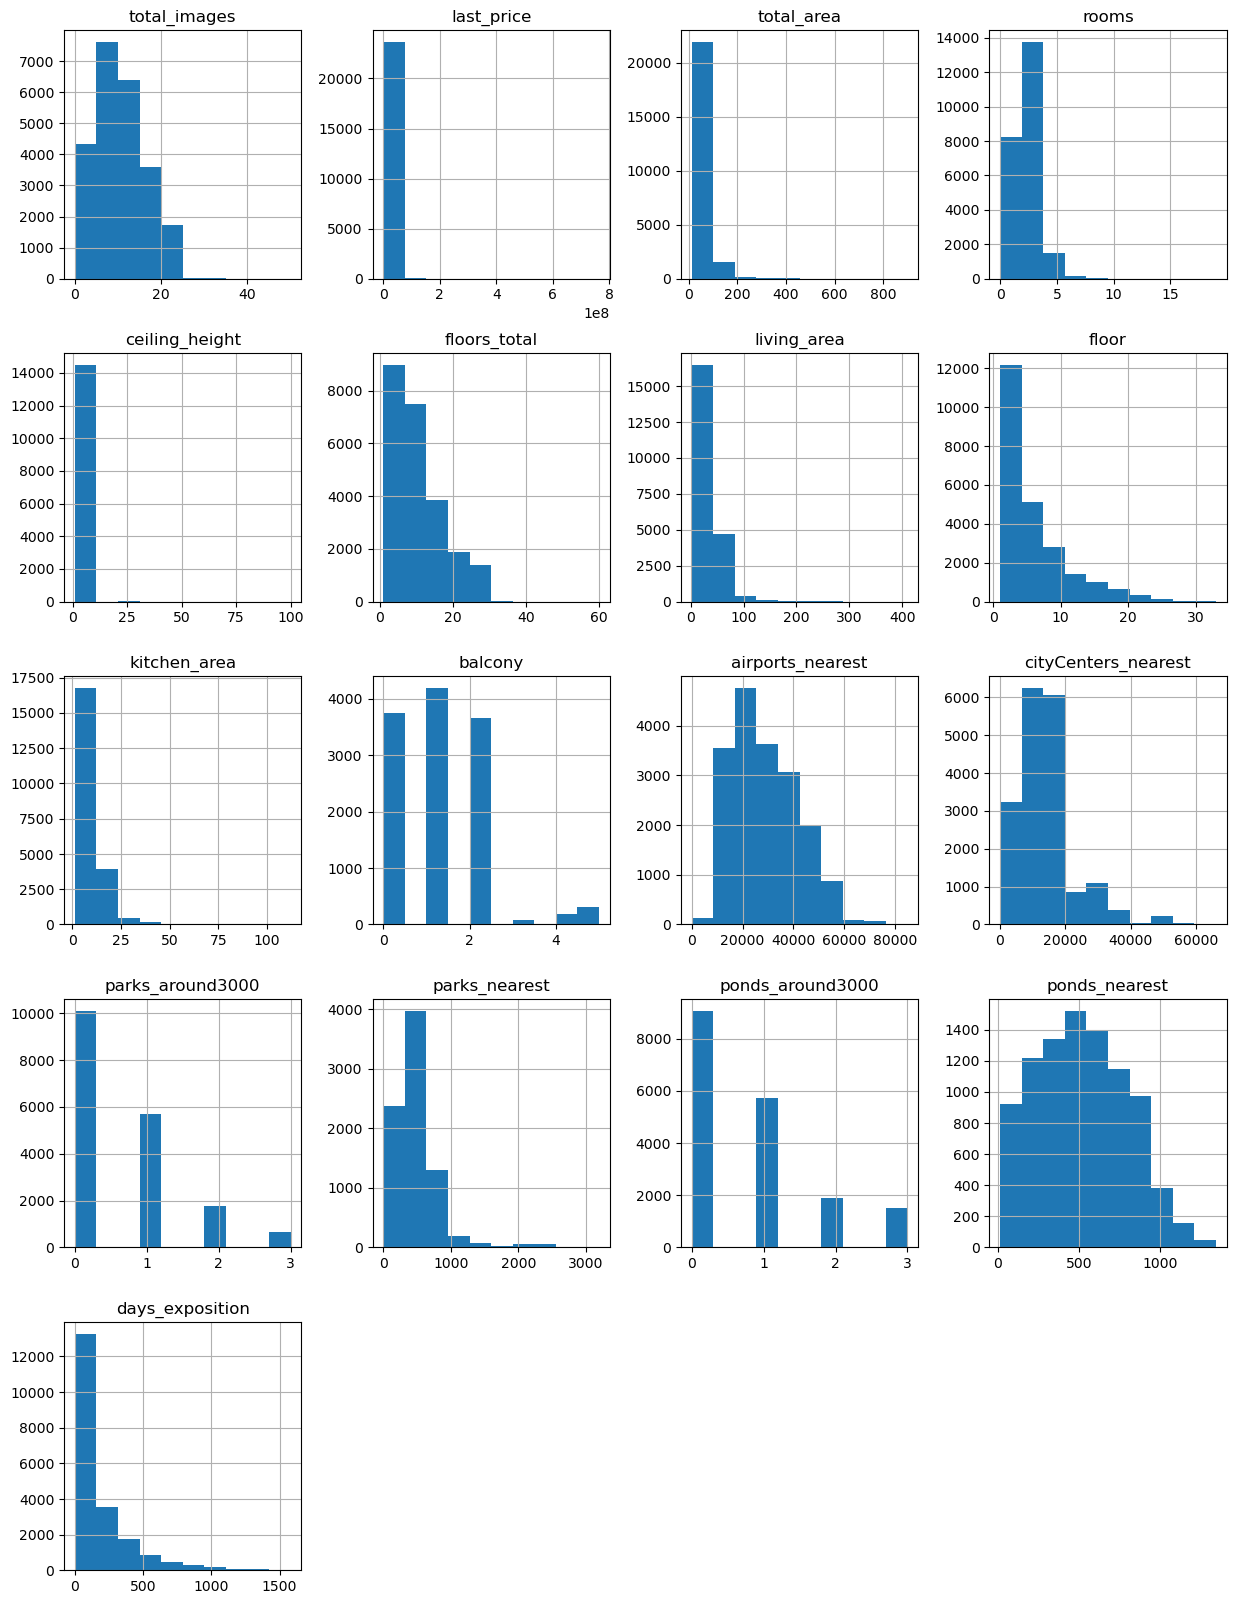

In [6]:
data.hist(figsize=(15, 20))

In [7]:
data.duplicated().sum()

0

Полных дубликатов строк не обнаружено.

### Предобработка данных

#### Замена пропусков

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Выявлены пропуски в данных. Вероятные причины пропусков:
* **Высота потолков (ceiling_height)** - данные не заполнены подателем объявления.
* **Апартаменты (is_apartment)** - значение не было отмечено для квартир, не являющихся апартаментами.
* **Общее количество этажей(floors_total)** - данные не заполнены подателем объявления.
* **Количество балконов (balcony)** - парамерт не заполнен для квартир, где нет балконов.
* **Площадь кухни (kitchen_area) и жилая площадь(living_area)** - возможно данные не заполнены для студий и квартир со свободной планировкой, либо значение не известно подателю объявления.        
* **Название населённого пункта (locality_name)** - ошибка при вводе данных, скорее всего есть предустановленная база населённых пунктов(картографичсекий сервис) и введённое подателем объявления значение отсутствует в базе по причине неверной орфографии или написанию другим способом. Если данное значение предустанавливается в объявление по геоопределению в момент сесии подачи объявления и податель не ввёл населённый пункт, возможно данные не записались.
* **Количество парков и прудов в радиусе 3км (parks_around3000 и ponds_around3000)** - необходимо уточнить расчет данных. Количество пропусков одинаково, возможно они в одних и тех же строках - логично что в парке есть пруд. Если параметр вводится вручную, то, скорее всего он не указан, если парки и пруды дальше 3 км, либо податель объявления не ввёл данные.</li>
* **Расстояния до ближайших аэропорта, центра города, парка и пруда (airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest)** - данные рассчитываются автоматически по координатам дома. Некорректный(в неверном формате, с опечаткой и пр.) ввод адреса не позволил рассчитать эти расстояния.
* **Количество дней размещения (day_exposition)** - скорее всего отсутствует дата снятия, т.е., на момент создания исходных данных объявление ещё активно.

Возможно выполнить следующие замены:
* **Высота потолков (ceiling_height)** - замена на самое распространённое. Высота потолков одинакова для типовой застройки. Попадание объявления в самую популярную типовую застройку наиболее вероятно.
* **Апартаменты (is_apartment)** - замена на нет(False). Вероятно значение не было отмечено для квартир, не являющихся апартаментами.
* **Количество балконов (balcony)** - замена на 0.
* **Площадь кухни (kitchen_area)**- необходимо отдельно исследовать тип планировки "студия" и квартиры со свободной планировкой, где кухни нет как отдельного помещения. Если все пропуски в этой категории, возможно заменить на медиану по студиям. Пропуски в квартирах с кухней заменить на средний % от общей площади исходя из известных данных.
* **Жилая площадь(living_area)** - жилая площадь складывается из площадей комнат, поэтому для замены целесообразно разделить квартиры на группы по количеству комнат и произвести замену для медианного % в каждой группе.
* **Название населённого пункта locality_name**> - проверить строки и заменить на наиболее похожее по прочим параметрам, если % данных небольшой - удалить.
* **Количество парков и прудов в радиусе 3км (parks_around3000 и ponds_around3000)** - замена на 0.        


In [9]:
#замена пропусков высоты потолков
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [10]:
#замена пропусков в данных о балконах
data['balcony'] = data['balcony'].fillna(0) 

In [11]:
#пропуски в количестве этажей
data['floors_total'].isna().sum() / len(data)

0.0036288450989493226

*пропуски в количестве этажей составляют 0,3% от общих данных - строками можно пренебречь.*

In [12]:
data = data.dropna(subset=['floors_total'])
data['floors_total'].isna().sum()

0

In [13]:
#замена данных в статусе "апартаменты"
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23563
True        50
Name: is_apartment, dtype: int64

In [14]:
#пропуски в площади кухни
data.loc[data['kitchen_area'].isna() == True, ['studio', 'open_plan']].value_counts()

studio  open_plan
False   False        2018
True    False         146
False   True           67
dtype: int64

*для 213 квартир (студии и свободная планировка) данные об отсутствии кухни правдоподобны. Для 2018 квартир в кухнями вероятно данные не введены. Данные для квартир условно без кухни исследовать дополнительно.*

In [15]:
data.loc[data['studio'] == True, 'kitchen_area'].unique()


array([nan])

*площадь кухни не указана ни у одной студии - оставляем пропуск*

In [16]:
data.loc[data['open_plan'] == True, 'kitchen_area'].unique()


array([nan])

*площадь кухни не указана ни у одной квартиры со свободной планировкой - оставляем пропуск*

In [17]:
len(data.loc[(data['open_plan'] == True) | (data['studio'] == True)]) / len(data) #доля студий и квартир со свободной планировкой

0.009020454834201498

*Студии и квартиры со свободной планировкой составляют менее 1% от общего количества данных, стоимость таких квартир при общих равных факторах будет ниже обычной квартиры, поэтому для дальнейших исследований принято решение удалить данные о таких объектах*

In [18]:
data = data.loc[(data['open_plan'] == False) & (data['studio'] == False)] #удаление студий и свободных планировок
#data.info()

In [19]:
rooms_num_kitchen = data.groupby('rooms')['kitchen_area'].median()
rooms_num_total = data.groupby('rooms')['total_area'].median()
rooms_num_kitchen_part = rooms_num_kitchen / rooms_num_total

for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['kitchen_area'].isna() == True), 'kitchen_area'] = \
    data.loc[(data['rooms'] == r) & (data['kitchen_area'].isna() == True), 'kitchen_area'].fillna(data['total_area']*rooms_num_kitchen_part[r]).round(2)
#data['kitchen_area'].isna().sum()

*пропуски в площади кухни у квартир, где она должна быть, заменены на процент от общей площади квартиры с учетом количетва комнат.*

In [20]:
data.loc[data['living_area'].isna() == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,...,20.72,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,NaN,2,False,...,8.07,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,7.52,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,NaN,3,False,...,9.84,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,False,...,10.46,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,...,9.82,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,11.21,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.65,9.0,NaN,4,False,...,8.61,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


In [21]:
#пропуски в жилой площади
rooms_num_living = data.groupby('rooms')['living_area'].median()
rooms_num_total = data.groupby('rooms')['total_area'].median()
rooms_num_living_part = rooms_num_living / rooms_num_total
for r in data['rooms'].unique():
    data.loc[(data['rooms'] == r) & (data['living_area'].isna() == True), 'living_area'] = \
    data.loc[(data['rooms'] == r) & (data['living_area'].isna() == True), 'living_area'].fillna(data['total_area']*rooms_num_living_part[r]).round(2)
data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'rooms']]   

,total_area,living_area,kitchen_area,rooms
0,108.00,51.00,25.00,3
1,40.40,18.60,11.00,1
2,56.00,34.30,8.30,2
3,159.00,98.15,20.72,3
4,100.00,32.00,41.00,2
...,...,...,...,...
23694,133.81,73.30,13.83,3
23695,59.00,38.00,8.50,3
23696,56.70,29.70,9.31,2
23697,76.75,44.17,23.30,2


*т.к. студии и квартиры со свободной планировкой уже удалены, то пропуски жилой площади заменяем на % от общей площади с учетом  количества комнат*

In [22]:
#проверка корректности площадей
areas_mistakes = data.loc[(data['kitchen_area'] + data['living_area']) > data['total_area'], ['total_area', 'living_area', 'kitchen_area', 'rooms']]
print(len(areas_mistakes))
len(areas_mistakes)/len(data)


111


0.004743589743589744

*проверка корректности данных выявила 111 квартир, в которых сумма жилой площади и площади кухни превышают общую площадь. В данных явно ошибка. Т.к. в квартире должна быть ещё нежилая площадь: санузел и коридор, равенство общей площади и суммы жилой площади и кухни также ошибочно. Предположим, что часть подателей объявления ошиблась в понятии жилой площади и удалим только явные ошибки.<br>
Данная ошибка может быть результатом замены только для очень нестандартной планировки, возможно для комнат в коммунальной квартире. Учитывыая общее количество таких ошибок - менее 0,5% - данными можно пренебречь.*

In [23]:
data = data.loc[(data['kitchen_area'] + data['living_area']) < data['total_area']]
#len(data)

In [24]:
#пропуски в названии нас. пункта
data['locality_name'].isna().sum() / len(data)

0.0020672724923553984

*доля пропущенных значений в названии населённого пункта составляет 0,2% - строками можно пренебречь.*

In [25]:
data = data.dropna(subset=['locality_name'])

In [26]:
#замена пропусков в количестве парков и прудов в 3км
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

#### Обработка данных о местоположении

In [27]:
data['locality_name'].value_counts() 

Санкт-Петербург                    15424
посёлок Мурино                       485
посёлок Шушары                       433
Всеволожск                           384
Пушкин                               368
                                   ...  
деревня Пельгора                       1
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
посёлок Дзержинского                   1
Name: locality_name, Length: 362, dtype: int64

In [28]:
#выделение названий из статуса поселения
data['locality_name_upper'] = data['locality_name'].str.findall('[А-Я].*').explode().dropna()
data['locality_name_upper'].value_counts()

Санкт-Петербург    15424
Мурино               546
Кудрово              441
Шушары               433
Всеволожск           384
                   ...  
Алексеевка             1
Белоостров             1
Пельгора               1
Каложицы               1
Дзержинского           1
Name: locality_name_upper, Length: 303, dtype: int64

In [29]:
#проверка населённых пунктов с одинаковым названием
data_name = data.groupby(['locality_name_upper', 'locality_name'])['cityCenters_nearest'].mean()
print(data_name.to_string())


locality_name_upper      locality_name                                          
Агалатово                деревня Агалатово                                                   NaN
Александровская          посёлок Александровская                                    27468.000000
Алексеевка               посёлок Алексеевка                                                  NaN
Аннино                   поселок Аннино                                                      NaN
                         посёлок Аннино                                                      NaN
Аро                      деревня Аро                                                         NaN
Барышево                 поселок Барышево                                                    NaN
Батово                   деревня Батово                                                      NaN
Бегуницы                 деревня Бегуницы                                                    NaN
Белогорка                деревня Белогорка    

In [30]:
#разделение разных населённых пунктов с одинаковым названием
data.loc[data['locality_name'] == 'деревня Зимитицы', 'locality_name_upper'] = 'деревня Зимитицы'
data.loc[data['locality_name'] == 'поселок Зимитицы', 'locality_name_upper'] = 'поселок Зимитицы'
data.loc[data['locality_name'] == 'деревня Калитино', 'locality_name_upper'] = 'деревня Калитино'
data.loc[data['locality_name'] == 'поселок Калитино', 'locality_name_upper'] = 'поселок Калитино'
data.loc[data['locality_name'] == 'село Никольское', 'locality_name_upper'] = 'село Никольское'
data.loc[data['locality_name'] == 'село Павлово', 'locality_name_upper'] = 'село Павлово'
data.loc[data['locality_name'] == 'городской посёлок Павлово', 'locality_name_upper'] = 'пгт Павлово'
data.loc[data['locality_name'] == 'поселок городского типа Приладожский', 'locality_name_upper'] = 'пгт Приладожский'
data.loc[data['locality_name'] == 'садовое товарищество Приладожский', 'locality_name_upper'] = 'ст Павлово'
data.loc[data['locality_name'] == 'деревня Рабитицы', 'locality_name_upper'] = 'деревня Рабитицы'
data.loc[data['locality_name'] == 'поселок Рабитицы', 'locality_name_upper'] = 'поселок Рабитицы'
data.loc[data['locality_name'] == 'деревня Щеглово', 'locality_name_upper'] = 'деревня Щеглово'
data.loc[data['locality_name'] == 'посёлок Щеглово', 'locality_name_upper'] = 'посёлок Щеглово'


In [31]:
data['locality_name_upper'].value_counts()

Санкт-Петербург    15424
Мурино               546
Кудрово              441
Шушары               433
Всеволожск           384
                   ...  
деревня Щеглово        1
Алексеевка             1
Белоостров             1
Каложицы               1
Дзержинского           1
Name: locality_name_upper, Length: 311, dtype: int64

*В результате обработки в столбце locality_name_full собраны все уникальные населённые пункты. Выявлен и исправлен 51 дубль. Статус нас. пункта не важен для исследования, поэтому названия можно оставить в том виде, в котором они записаны в locality_name_full. Для удобства переименуем locality_name в locality_name_full, а locality_name_upper в locality_name*

In [32]:
data = data.rename({'locality_name':'locality_name_full',}, axis=1)
data = data.rename({'locality_name_upper':'locality_name',}, axis=1)
data.head()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,98.15,9,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


#### Исследование пропусков в расстояниях

In [33]:
print('Процент пропусков в удалении от аэропорта:', (data['airports_nearest'].isna().sum() / len(data)*100).round(1), '%')
print('Процент пропусков в удалении от центра города:', (data['cityCenters_nearest'].isna().sum() / len(data)*100).round(1), '%')
print('Процент пропусков в расстоянии до ближайшего парка:', (data['parks_nearest'].isna().sum() / len(data)*100).round(1), '%')
print('Процент пропусков в удалении до ближайшего пруда:', (data['ponds_nearest'].isna().sum() / len(data)*100).round(1), '%')

Процент пропусков в удалении от аэропорта: 23.2 %
Процент пропусков в удалении от центра города: 23.1 %
Процент пропусков в расстоянии до ближайшего парка: 65.7 %
Процент пропусков в удалении до ближайшего пруда: 61.5 %


*Очевидно, что координаты центра города и аэропорта известны. Однако, количество пропусков в них различается. Возможно это ошибка, а возможно, есть какой-то лимит для этого показателя.*

*Проверим, есть ли пропуски в больших населённые пунктах.*

In [34]:
data.loc[(data['airports_nearest'].isna() == True) &\
         (data['cityCenters_nearest'].isna() == True), 'locality_name'].value_counts().head(10)

Мурино             546
Кудрово            441
Всеволожск         384
Гатчина            303
Выборг             234
Новое Девяткино    140
Сертолово          138
Кириши             125
Бугры              110
Волхов             110
Name: locality_name, dtype: int64

*Судя по названиям, можно сделать предположение, что данные не считаются для объектов Ленинградской области.*

In [35]:
data.loc[(data['parks_nearest'].isna() == True) &\
         (data['ponds_nearest'].isna() == True), 'locality_name'].value_counts().head(10)

Санкт-Петербург    4626
Мурино              546
Кудрово             441
Всеволожск          384
Гатчина             303
Шушары              282
Парголово           267
Выборг              234
Новое Девяткино     140
Сертолово           138
Name: locality_name, dtype: int64

In [36]:
no_nearest = data.pivot_table(index='locality_name', values=['airports_nearest', 'cityCenters_nearest', 'parks_nearest', 'ponds_nearest'], aggfunc='sum').reset_index()
print('Для', len(no_nearest.loc[(no_nearest['airports_nearest']==0) & (no_nearest['cityCenters_nearest']==0)]), 'населённых пунктов нет ни одного известного расстояния до аэропорта и центра города.')
print('Для', len(no_nearest.loc[(no_nearest['parks_nearest']==0) & (no_nearest['ponds_nearest']==0)]), 'населённых пунктов нет ни одного известного расстояния до ближайшего пруда и парка.')

Для 287 населённых пунктов нет ни одного известного расстояния до аэропорта и центра города.
Для 294 населённых пунктов нет ни одного известного расстояния до ближайшего пруда и парка.


*В данных о расстоянии до аэропорта и центра города есть пропуски для населённых пунктов с количеством объявлений свыше 540.*

*В данных о расстоянии до аэропорта и центра города есть пропуски даже для Санкт-Петербурга.*
    
*Для 287 из 311 населённых пунктов нет ни одного известного расстояния до аэропорта и центра города и для 294 - до ближайшего пруда и парка.*

*Т.к. расстояние может быть любым, заполнять пропуски не опираясь на данные нецелесообразно.*

#### Изменение форматов данных

In [37]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition']) #преобразование в дату 
data['is_apartment'] = data['is_apartment'].astype(bool) #преобразование в булево значение
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)


*Прозведена замена форматов данных в столбцах:*
<ul><li>дата начала публикации (first_day_exposition) - это однозначно дата, преобразована в формат даты;</li>
<li>апартаменты (is_apartment) - булево значение;</li>
<li>число этажей дома (floors_total), количество балконов(balcony), количества парков и прудов в 3 км (parks_around3000, ponds_around3000) - могут быть только целыми, преобразовано в целые числа;</li>
<li>количество дней экспозиции (days_exposition) - также может быть только целым, т.к. дата публикации указана с точностью до дней (но преобразовать не можем, т.к. оставлены пропуски)</li>
</ul>

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23171 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23171 non-null  int64         
 1   last_price            23171 non-null  float64       
 2   total_area            23171 non-null  float64       
 3   first_day_exposition  23171 non-null  datetime64[ns]
 4   rooms                 23171 non-null  int64         
 5   ceiling_height        23171 non-null  float64       
 6   floors_total          23171 non-null  int32         
 7   living_area           23171 non-null  float64       
 8   floor                 23171 non-null  int64         
 9   is_apartment          23171 non-null  bool          
 10  studio                23171 non-null  bool          
 11  open_plan             23171 non-null  bool          
 12  kitchen_area          23171 non-null  float64       
 13  balcony         

#### Анализ аномалий

In [39]:
data.describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23171.00,2.317100e+04,23171.00,23171.00,23171.00,23171.00,23171.00,23171.00,23171.00,23171.00,17796.00,17819.00,23171.00,7943.00,23171.00,8911.00,20037.00
mean,9.90,6.565496e+06,60.67,2.09,2.72,10.61,34.72,5.85,10.47,0.59,28833.50,14209.69,0.47,490.41,0.59,518.10,181.71
std,5.68,1.093088e+07,35.65,1.07,0.72,6.56,22.74,4.85,5.77,0.96,12632.95,8639.84,0.75,340.83,0.88,277.96,220.37
min,0.00,1.219000e+04,13.00,1.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.450000e+06,40.30,1.00,2.60,5.00,18.80,2.00,7.10,0.00,18585.00,9238.00,0.00,288.00,0.00,293.00,45.00
50%,9.00,4.650000e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,26773.00,13094.00,0.00,455.00,0.00,503.00,96.00
75%,14.00,6.800000e+06,70.00,3.00,2.70,15.00,42.40,8.00,11.80,1.00,37298.00,16293.00,1.00,612.00,1.00,730.00,233.00
max,50.00,7.630000e+08,900.00,19.00,32.00,60.00,427.55,33.00,121.50,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


*исходя из максимального и минимального значения можно выделить столбцы, которые стоит проверить на аномальные значения:*
- total_area (значение 12м и 900м);
- ceiling_height (1м, 32м);
- floors_total (60);
- airports_nearest (0м);

In [40]:
#контроль
len(data)

23171

In [41]:
#аномалии общей площади
data.loc[(data['total_area'] < 23)].sort_values('total_area') #срез по маленьким квартирам

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name
19546,3,1850000.0,13.00,2019-03-11,1,3.40,5,6.25,2,False,...,0,Санкт-Петербург,24915.0,5483.0,1,644.0,0,NaN,24.0,Санкт-Петербург
17961,3,1400000.0,13.00,2017-12-03,1,2.60,9,6.25,1,False,...,0,Санкт-Петербург,14350.0,15945.0,0,NaN,1,185.0,410.0,Санкт-Петербург
19558,2,1686000.0,13.20,2018-12-17,1,2.65,5,6.35,1,False,...,0,Санкт-Петербург,19891.0,4165.0,1,361.0,1,155.0,19.0,Санкт-Петербург
19642,5,1190000.0,14.00,2018-07-29,1,2.65,5,11.00,1,False,...,0,Санкт-Петербург,9898.0,11122.0,0,NaN,0,NaN,4.0,Санкт-Петербург
12040,5,1900000.0,15.00,2018-06-27,1,2.50,5,7.21,1,False,...,0,Сосновый Бор,NaN,NaN,0,NaN,0,NaN,45.0,Сосновый Бор
16949,9,1550000.0,15.00,2018-08-21,1,2.70,9,7.21,1,False,...,0,Санкт-Петербург,51048.0,16376.0,0,NaN,1,1079.0,42.0,Санкт-Петербург
10208,3,1900000.0,17.00,2018-08-14,1,2.75,4,13.00,2,False,...,0,Санкт-Петербург,25072.0,5639.0,0,NaN,0,NaN,7.0,Санкт-Петербург
22356,6,2050000.0,17.20,2019-01-13,1,2.77,23,8.27,1,False,...,0,Санкт-Петербург,33645.0,13513.0,0,NaN,0,NaN,7.0,Санкт-Петербург
4542,12,3300000.0,18.00,2018-11-07,1,3.50,5,9.00,2,False,...,0,Санкт-Петербург,25157.0,4948.0,2,349.0,1,963.0,9.0,Санкт-Петербург
6084,6,770000.0,18.00,2017-10-16,1,2.65,5,13.00,4,False,...,0,Тихвин,NaN,NaN,0,NaN,0,NaN,90.0,Тихвин


*объект с общей площадью в 12м2 не единственный маленький объект. Данные о цене соответствуют метражу. Такие микроквартиры могли появиться в результате дробления коммунальных квартир. Считаем, что они правдоподобны.*

In [42]:
data.loc[(data['total_area'] > 150)].describe().round(2) #срез по большим квартирам

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,557.00,5.570000e+02,557.00,557.00,557.00,557.00,557.00,557.00,557.00,557.00,536.00,539.00,557.00,364.00,557.00,389.00,412.00
mean,11.56,4.105733e+07,216.03,4.96,3.06,7.91,128.04,5.56,25.78,0.44,27203.18,7433.31,1.13,429.22,1.29,419.15,310.12
std,6.83,5.408680e+07,83.58,1.83,0.47,4.88,54.19,4.25,14.94,0.99,8593.34,7218.07,1.05,311.22,1.10,268.09,296.43
min,0.00,3.200000e+06,150.30,1.00,2.50,2.00,38.00,1.00,5.00,0.00,10015.00,181.00,0.00,21.00,0.00,16.00,5.00
25%,6.00,1.785000e+07,165.00,4.00,2.65,5.00,95.00,3.00,16.40,0.00,22408.50,3792.50,0.00,241.00,0.00,198.00,90.00
50%,12.00,2.580000e+07,186.70,5.00,3.00,6.00,112.40,4.00,21.10,0.00,25026.00,5204.00,1.00,400.50,1.00,399.00,214.00
75%,19.00,4.000000e+07,235.00,6.00,3.30,9.00,150.00,7.00,30.00,1.00,30942.75,8159.00,2.00,555.25,2.00,611.00,437.25
max,28.00,7.630000e+08,900.00,19.00,6.00,25.00,427.55,25.00,121.50,5.00,73547.00,54646.00,3.00,3013.00,3.00,1270.00,1441.00


In [43]:
data.loc[(data['total_area'] > 150) & (data['rooms'] < 3)] #срез по большим квартирам с маленьким количеством комнат.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name
4323,5,25476800.0,160.0,2018-12-19,2,2.65,10,92.08,5,False,...,0,Санкт-Петербург,NaN,NaN,0,NaN,0,NaN,NaN,Санкт-Петербург
5232,2,77612080.0,152.3,2017-09-08,2,3.53,9,82.00,7,False,...,0,Санкт-Петербург,21912.0,2389.0,1,545.0,1,478.0,341.0,Санкт-Петербург
5659,2,11067416.0,160.7,2018-08-01,2,3.00,2,92.48,1,False,...,0,посёлок Репино,61451.0,42550.0,0,NaN,0,NaN,238.0,Репино
7131,8,46000000.0,196.0,2016-07-21,2,3.20,10,112.79,2,False,...,0,Санкт-Петербург,32537.0,6589.0,0,NaN,3,99.0,988.0,Санкт-Петербург
9826,1,43185328.0,494.1,2017-05-12,1,2.85,12,237.60,3,False,...,0,Санкт-Петербург,28529.0,6832.0,1,592.0,0,NaN,5.0,Санкт-Петербург
17692,1,15782000.0,159.0,2015-10-27,2,2.65,3,43.00,1,False,...,1,Пушкин,16877.0,29030.0,2,676.0,3,278.0,272.0,Пушкин
21338,15,3200000.0,190.0,2016-06-16,1,3.00,6,43.00,4,False,...,0,Санкт-Петербург,22592.0,4312.0,1,350.0,0,NaN,11.0,Санкт-Петербург
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.70,6,False,...,0,Санкт-Петербург,22494.0,1073.0,3,386.0,3,188.0,NaN,Санкт-Петербург


*Из среза по большим "малокомнатным" квартирам выбивается 2 объявления:* 
* однокомнатная квартира площадью 190м2 за 3,3 млн руб., причем жилая площать всего 43м2.
* двухкомнатная квартира площадью в 159м2, однако жилая площадь также всего 43м2.

*В этих строках вероятна ошибка. Принято решение их удалить*

In [44]:
data = data.drop(17692)
data = data.drop(21338)
data.loc[(data['total_area'] > 150) & (data['rooms'] < 3)]
len(data)

23169

2.65    9553
2.50    3484
2.60    1625
2.70    1536
3.00    1095
2.55     976
2.80     961
2.75     887
3.20     274
3.10     199
Name: ceiling_height, dtype: int64


<AxesSubplot:>

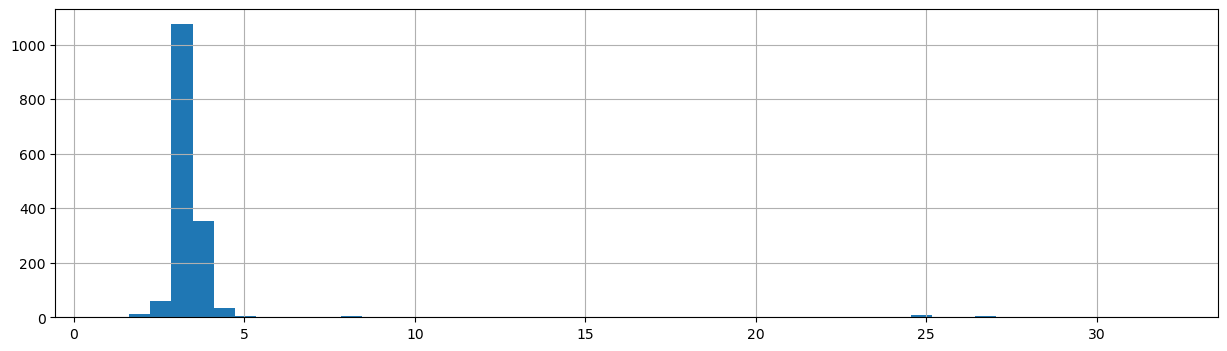

In [45]:
#проверка высоты потолков
print(data['ceiling_height'].value_counts().head(10))
data.loc[(data['ceiling_height'] < 2.5) | (data['ceiling_height'] > 3), 'ceiling_height'].hist(figsize=(15,4), bins=50) #удалены самые популярные значения

*На диаграмме отображены окличество квартир с потолками до 2,5м и выше 3. Очевидно, что высота потолков ниже 2м не подходит для жилья - возможно это ошибка. Квартиры с потолком ниже 2,5м можно отнести к уникальным объектам.*

*Квартиры с высотой потолков от 3 до 6м сущесвтвуют, но их относительно немного.*

*Квартиры с потолками от 6 до 20м, представить крайне сложно, если они существуют, то такие квартиры крайне уникальны.  их не стоит сравнивать с обычными объектами. Высота потолков более 5м открывает возможности для создания 2-х этажной квартиры - это может стать дополнительным фактором ценообразования. Решено исключить такие квартиры из исследования.*

*Значения от 20 до 30м, а так же 100м вероятно опечатки.*

In [46]:
data = data.loc[data['ceiling_height'] >= 2] #удаление квартир с потолками ниже 2-х метров
len(data)

23166

In [47]:
data.loc[(data['ceiling_height'] < 20) & (data['ceiling_height'] > 5)].sort_values('ceiling_height') #срез по высоте потолков от 5 до 20м

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name
464,15,66571000.0,280.3,2015-06-11,6,5.2,8,159.50,7,False,...,0,Санкт-Петербург,26316.0,6655.0,3,187.0,1,616.0,578.0,Санкт-Петербург
1026,20,155000000.0,310.0,2018-10-12,5,5.3,3,190.00,3,False,...,2,Санкт-Петербург,24899.0,4785.0,0,NaN,1,603.0,NaN,Санкт-Петербург
12628,14,3900000.0,50.0,2018-03-29,1,5.3,5,24.04,5,False,...,0,Санкт-Петербург,19644.0,3918.0,1,505.0,1,92.0,8.0,Санкт-Петербург
7578,17,38000000.0,143.0,2017-11-02,3,5.5,5,83.00,5,False,...,1,Санкт-Петербург,26333.0,6448.0,3,479.0,0,NaN,NaN,Санкт-Петербург
1388,20,59800000.0,399.0,2015-01-21,5,5.6,6,251.35,6,False,...,0,Санкт-Петербург,26204.0,6934.0,2,149.0,2,577.0,719.0,Санкт-Петербург
20264,17,119000000.0,187.6,2017-07-10,4,6.0,7,147.00,7,False,...,0,Санкт-Петербург,26902.0,5605.0,3,484.0,1,305.0,259.0,Санкт-Петербург
3474,3,1400000.0,30.0,2018-03-16,1,8.0,5,15.30,2,False,...,0,деревня Нурма,NaN,NaN,0,NaN,0,NaN,125.0,Нурма
15743,14,5600000.0,67.0,2016-11-11,3,8.0,16,41.00,1,False,...,0,Санкт-Петербург,32691.0,11035.0,1,723.0,0,NaN,474.0,Санкт-Петербург
17442,0,5350000.0,54.0,2015-06-16,2,8.0,5,29.00,2,False,...,1,Красное Село,24638.0,28062.0,0,NaN,0,NaN,469.0,Красное Село
5863,20,5650000.0,45.0,2018-08-15,1,8.3,16,19.30,14,False,...,1,Санкт-Петербург,13069.0,10763.0,0,NaN,1,613.0,14.0,Санкт-Петербург


*если соотнести нетипичную высоту потолков с данными и площади и цене объекта, часть данных выглядит правдоподобно, часть - скорее всего ошибочны, однако таких позиций крайне мало, их можно удалить.*

In [48]:
ceiling_list = data.loc[(data['ceiling_height'] < 20) & (data['ceiling_height'] > 5)].index.values.tolist()
data = data.drop(ceiling_list)
len(data)

23154

In [49]:
data.loc[(data['ceiling_height'] > 20) & (data['ceiling_height'] < 30)] #срез по вероятным опечаткам

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name
355,17,3600000.0,55.2,2018-07-12,2,25.0,5,32.0,2,False,...,2,Гатчина,NaN,NaN,0,NaN,0,NaN,259.0,Гатчина
4643,0,4300000.0,45.0,2018-02-01,2,25.0,9,30.0,2,False,...,1,Санкт-Петербург,12016.0,13256.0,1,658.0,1,331.0,181.0,Санкт-Петербург
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5,19.5,1,True,...,0,Санкт-Петербург,29686.0,8389.0,3,397.0,1,578.0,7.0,Санкт-Петербург
5246,0,2500000.0,54.0,2017-10-13,2,27.0,5,30.0,3,False,...,2,деревня Мины,NaN,NaN,0,NaN,0,NaN,540.0,Мины
5669,4,4400000.0,50.0,2017-08-08,2,26.0,9,21.3,3,False,...,2,Санкт-Петербург,28981.0,10912.0,1,305.0,0,NaN,267.0,Санкт-Петербург
5807,17,8150000.0,80.0,2019-01-09,2,27.0,36,41.0,13,False,...,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,Санкт-Петербург
6246,6,3300000.0,44.4,2019-03-25,2,25.0,5,31.3,5,False,...,0,Кронштадт,68923.0,50649.0,1,417.0,2,73.0,NaN,Кронштадт
9379,5,3950000.0,42.0,2017-03-26,3,25.0,5,30.0,2,False,...,0,Санкт-Петербург,11647.0,13581.0,0,NaN,0,NaN,NaN,Санкт-Петербург
10773,8,3800000.0,58.0,2017-10-13,2,27.0,10,30.1,3,False,...,2,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,71.0,Мурино
11285,0,1950000.0,37.0,2019-03-20,1,25.0,5,17.0,4,False,...,2,Луга,NaN,NaN,0,NaN,0,NaN,18.0,Луга


*в цене и площади квартир с потолками от 20 до 30м нет аномально высоких показателей. Принято решение разделить их на 10, чтобы получить более правдоподобные значения.*

23154

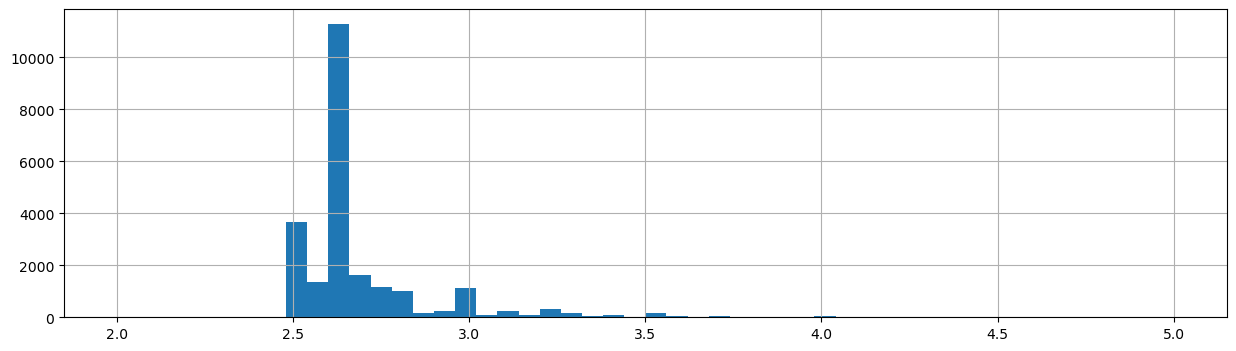

In [50]:
#удаление опечаток
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10
data['ceiling_height'].hist(figsize=(15,4), bins=50) #данные после очистки
len(data)

<AxesSubplot:>

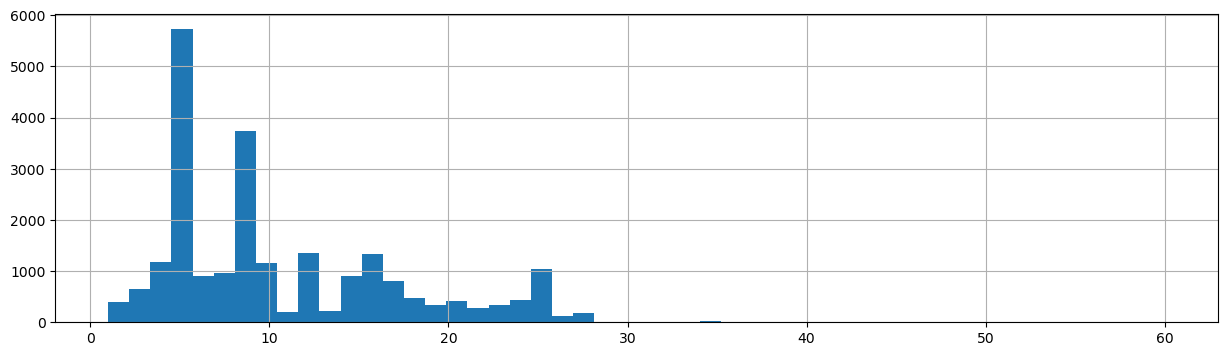

In [51]:
#проверка этажности
data['floors_total'].hist(figsize=(15,4), bins=50)

In [52]:
data.sort_values('floors_total', ascending=False).head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name
2253,12,3800000.0,45.5,2018-06-28,2,2.88,60,27.4,4,False,...,0,Кронштадт,67763.0,49488.0,2,342.0,3,614.0,166.0,Кронштадт
16731,9,3978000.0,40.0,2018-09-24,1,2.65,52,10.5,18,False,...,0,Санкт-Петербург,20728.0,12978.0,1,793.0,0,NaN,45.0,Санкт-Петербург
11079,16,9200000.0,75.0,2019-02-22,2,2.70,36,40.0,29,False,...,2,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,NaN,Санкт-Петербург
5807,17,8150000.0,80.0,2019-01-09,2,2.70,36,41.0,13,False,...,5,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,38.0,Санкт-Петербург
397,15,5990000.0,54.0,2018-03-22,2,2.65,36,21.4,28,False,...,1,Санкт-Петербург,18732.0,20444.0,0,NaN,3,80.0,11.0,Санкт-Петербург


In [53]:
data.loc[data['floors_total'] > 18].value_counts('floors_total')

floors_total
25    1035
24     440
23     338
19     328
22     280
20     263
27     160
21     149
26     120
28      21
35      21
36       3
29       1
33       1
34       1
52       1
60       1
dtype: int64

*выявлено 2 ошибочных значения: 52 и 60 - жилых домов с таким количеством этажей нет в Санкт-Петербурге.*

*Квартира в "60 - этажном" доме находится на 4 этаже, сокрее всего тут опечатка и дом 6-этажный. Заменим значение на 6.*

*Квартира в "52 - этажном" доме находится на 18 этаже - заменим на самую популярную этажность дома выше 18 эт. - это 25.*

In [54]:
data.loc[2253, 'floors_total'] = 6
data.loc[16731, 'floors_total'] = 25

In [55]:
#проверка корректности этажа
data.loc[data['floors_total'] < data['floor']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name


*ни одна квартира не находится на этаже, превышающем общую этажность дома.*

<AxesSubplot:>

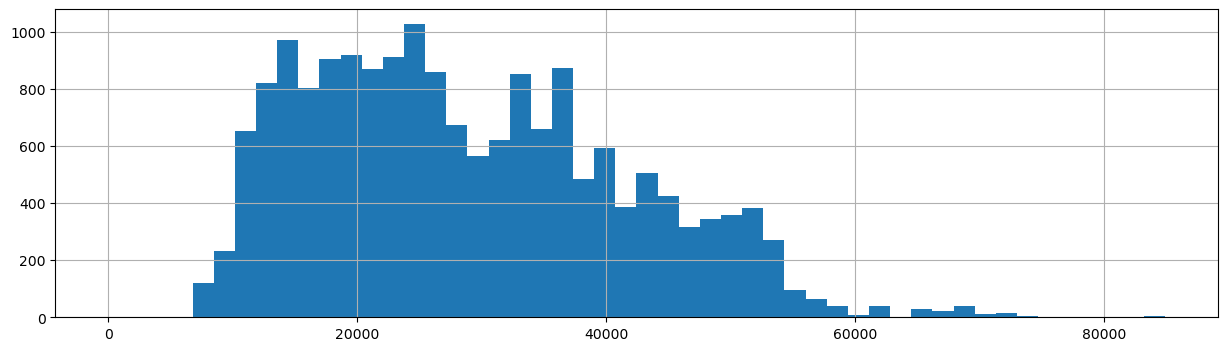

In [56]:
#проверка расстояния до аэропорта
data['airports_nearest'].hist(figsize=(15,4), bins=50)

*значения указаны в метрах, для упрощения исследования можно перевести данные в км, разделив на 1000 и округлив до км.*

In [57]:
data['airports_nearest_km'] = data['airports_nearest'] / 1000
data['airports_nearest_km'] = data['airports_nearest_km'].round(0)


<AxesSubplot:>

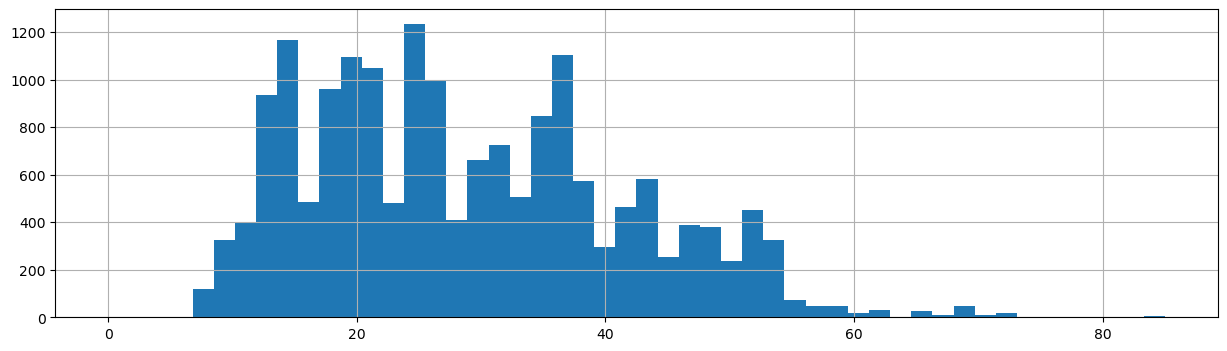

In [58]:
data['airports_nearest_km'].hist(figsize=(15,4), bins=50)

In [59]:
data.sort_values('airports_nearest_km').head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name_full,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name,airports_nearest_km
21085,0,7000000.0,34.7,2018-09-23,1,2.70,9,19.8,3,False,...,Санкт-Петербург,0.0,22801.0,0,NaN,0,NaN,60.0,Санкт-Петербург,0.0
4017,7,2268000.0,35.0,2017-12-21,1,2.65,9,14.0,6,False,...,Санкт-Петербург,6450.0,17461.0,0,NaN,1,444.0,25.0,Санкт-Петербург,6.0
12899,8,4199000.0,56.0,2017-12-21,2,2.65,9,27.0,5,False,...,Санкт-Петербург,6450.0,17461.0,0,NaN,1,444.0,24.0,Санкт-Петербург,6.0
22283,20,6290000.0,54.9,2019-03-17,2,2.50,14,34.4,5,False,...,Санкт-Петербург,6989.0,13205.0,1,535.0,0,NaN,NaN,Санкт-Петербург,7.0
8853,5,3699000.0,36.0,2017-05-03,1,2.65,25,15.0,21,False,...,Санкт-Петербург,7106.0,13322.0,1,1188.0,0,NaN,65.0,Санкт-Петербург,7.0


*квартира на расстоянии 0 км от аэропорта всего одна. Принято решение заменить его на медиану по СПб, т.к. объявление принадлежит к этому региону.*

In [60]:
data.loc[21085, 'airports_nearest_km'] = data['airports_nearest_km'].median()
data.loc[21085, 'airports_nearest_km']

27.0

In [61]:
#проверка расстояния до центра города
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] / 1000 #перевод расстояния до центра города в км
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round(0)

<AxesSubplot:>

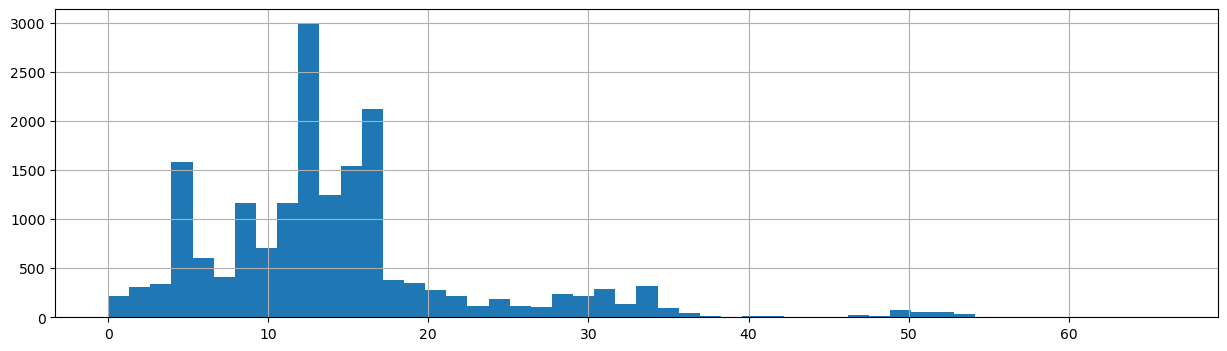

In [62]:
data['cityCenters_nearest_km'].hist(figsize=(15,4), bins=50)

In [63]:
data.loc[data['cityCenters_nearest'] < 1000, 'total_images':'cityCenters_nearest'] #срез по кавартирам в радиусе 500м от центра

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name_full,airports_nearest,cityCenters_nearest
492,18,95000000.0,216.0,2017-12-05,4,3.00,5,86.0,4,False,False,False,77.0,0,Санкт-Петербург,21740.0,436.0
660,3,49950000.0,483.9,2017-10-04,7,3.20,6,312.5,4,False,False,False,26.4,0,Санкт-Петербург,23079.0,945.0
750,9,29500000.0,188.8,2017-03-04,7,2.70,2,119.3,1,False,False,False,10.2,0,Санкт-Петербург,20965.0,814.0
1085,16,75000000.0,323.0,2017-07-10,5,4.00,5,255.7,4,False,False,False,66.0,0,Санкт-Петербург,23713.0,594.0
1104,0,7970000.0,63.0,2018-02-09,3,2.65,5,35.0,3,False,False,False,10.0,0,Санкт-Петербург,21135.0,743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21574,13,12300000.0,120.0,2018-09-21,4,3.10,4,78.0,4,False,False,False,14.0,0,Санкт-Петербург,20641.0,772.0
22036,3,7200000.0,72.0,2017-12-21,2,3.07,3,44.9,2,False,False,False,12.3,0,Санкт-Петербург,21875.0,329.0
22531,10,8000000.0,72.7,2018-02-02,3,3.05,4,40.5,4,False,False,False,12.0,0,Санкт-Петербург,20641.0,772.0
22533,11,9000000.0,69.5,2017-06-27,4,2.70,4,50.3,4,False,False,False,6.0,0,Санкт-Петербург,21547.0,833.0


In [64]:
data.loc[data['cityCenters_nearest'] < 1000].describe().round(2)

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,airports_nearest_km,cityCenters_nearest_km
count,83.00,8.300000e+01,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,83.00,71.00,83.00,83.00,69.00,83.00,83.00
mean,9.82,2.332095e+07,113.98,3.28,3.05,4.69,70.83,3.04,17.92,0.17,21755.69,620.29,1.92,394.86,2.48,274.36,222.32,21.77,0.70
std,6.57,2.874541e+07,69.81,1.33,0.44,1.00,49.32,1.27,14.83,0.44,778.52,210.02,1.04,244.90,0.53,184.48,271.95,0.80,0.46
min,0.00,3.500000e+06,33.60,1.00,2.50,2.00,22.80,1.00,5.40,0.00,20641.00,181.00,0.00,65.00,1.00,22.00,4.00,21.00,0.00
25%,4.00,8.500000e+06,71.45,2.00,2.65,4.00,40.75,2.00,9.74,0.00,21250.00,436.00,1.00,196.00,2.00,122.00,29.00,21.00,0.00
50%,10.00,1.150000e+07,96.00,3.00,3.00,5.00,56.00,3.00,12.38,0.00,21857.00,650.00,2.00,357.00,2.00,265.00,133.00,22.00,1.00
75%,15.00,2.650000e+07,130.00,4.00,3.30,5.00,80.00,4.00,21.40,0.00,22024.00,772.00,3.00,537.00,3.00,386.00,293.00,22.00,1.00
max,20.00,1.600000e+08,483.90,7.00,4.25,7.00,312.50,6.00,87.20,2.00,25962.00,996.00,3.00,1079.00,3.00,657.00,1572.00,26.00,1.00


In [65]:
len(data.loc[data['cityCenters_nearest'] < 1000])/len(data)

0.0035846937894100372

*Часть объявлений в радиусе 1 км от центра выглядит странно: несколько квартир по общей площади и высоте потолков напоминают типовую застройку современных многоквартирных домов. Доля квартир, с указанной удалённостью от центра составляет 0,3%. Во избежание искажения общих выводов, удалим все данные в этом радиусе.* 


In [66]:
one_km_cityCenter = data.loc[data['cityCenters_nearest'] < 1000].index.values.tolist()
data = data.drop(one_km_cityCenter)
len(data)

23071

In [67]:
len(data)/initial_data_len


0.9735009916030212

*В результате очистки данных от аномалий осталось 97,35% данных.*

### Рассчет доролнительных значений

In [68]:
#цена одного квадратного метра
data['meter_price'] = data['last_price'] / data['total_area']
data['meter_price'] = data['meter_price'].round(2)

#день недели, месяц, год публикации
data['weekday_exp'] = data['first_day_exposition'].dt.dayofweek
data['month_exp'] = data['first_day_exposition'].dt.month
data['year_exp'] = data['first_day_exposition'].dt.year
#data.head(10)

In [69]:
#тип этажа
data['floor_type'] = 'другой'
data.loc[data['floor'] == data['floors_total'], 'floor_type'] = 'последний'
data.loc[data['floor'] == 1, 'floor_type'] = 'первый'
data['floor_type'] = data['floor_type'].astype('category')

In [70]:
data.value_counts('floor_type')

floor_type
другой       16963
последний     3257
первый        2851
dtype: int64

In [71]:
data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'rooms', 'ceiling_height']].describe(percentiles=[.015, .25, .5, .75, .985]).round(2)

,total_area,living_area,kitchen_area,rooms,ceiling_height
count,23071.00,23071.00,23071.00,23071.00,23071.00
mean,60.43,34.56,10.43,2.09,2.69
std,35.17,22.40,5.68,1.06,0.21
min,13.00,2.00,1.30,1.00,2.00
1.5%,29.00,13.90,5.00,1.00,2.50
25%,40.20,18.80,7.10,1.00,2.60
50%,52.00,30.00,9.00,2.00,2.65
75%,69.80,42.20,11.78,3.00,2.70
98.5%,170.67,103.10,30.00,5.00,3.50
max,900.00,427.55,121.50,19.00,5.00


*Большинство квартир имеет:*
* общую площадь от 40,2 до 69,8 м2;
* жилую площадь от 18,8 до 42,2 м2;
* площадь кухни от 7,1 до 11,8 м2;
* от 1 до 3 комнат;
* высоту потолков от 2,6 до 2,7м.

*Значения, которые можно считать нетипичными - сумарно составляющие менее 3%:*
* общая площадь менее 29 и более 170,7 м2;
* жилая площадь менее 13,9 и более 103,1 м2;
* площадь кухни менее 5 и более 30 м2;
* высота потолков ниже 2 и выше 3,5м.

*Исключим из исследования нетипичные значения по общей и жилой площади. Площадь кухни не так важна, а удалив объявления с нетипичной высотой потолков, есть риск исказить данные о квартирах в центре города.*

array([[<AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'meter_price'}>]], dtype=object)

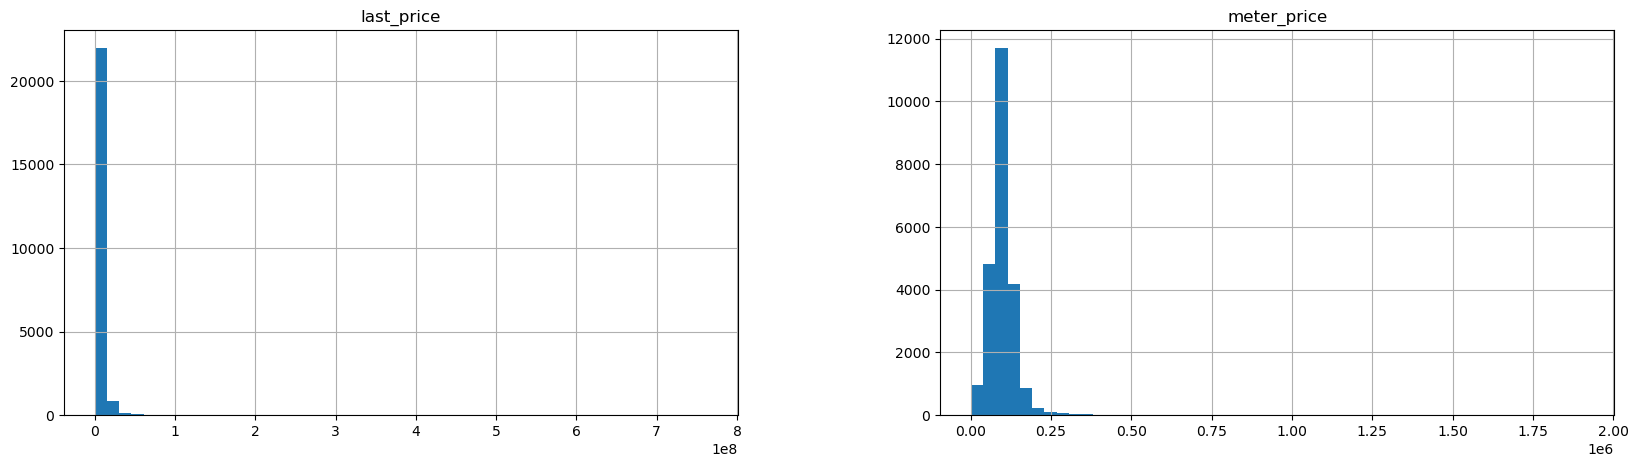

In [72]:
#исследование цены объекта
data.hist(column = ['last_price', 'meter_price'], figsize=(20,5), bins=50)

In [73]:
data.loc[:, ['last_price', 'meter_price']].describe(percentiles=[.015, .25, .5, .75, .985]).round(-3) #округление до тыс. руб.

,last_price,meter_price
count,23000.0,23000.0
mean,6488000.0,99000.0
std,10687000.0,49000.0
min,12000.0,0.0
1.5%,1180000.0,27000.0
25%,3450000.0,76000.0
50%,4650000.0,95000.0
75%,6767000.0,114000.0
98.5%,27932000.0,223000.0
max,763000000.0,1908000.0


*Большинство объектов имеют:* 
* общую цену от 3,5 до 6,7 млн руб.;
* цену за кв.м от 76 до 114 тыс руб.
 
*Нетипичные значения:*
* общую цену менее 1,2 и более 27 млн руб.;
* цену за кв.м менее 27 и более 223 тыс руб.
 
*Исключим из исследования нетипичные значения по цене квадратного метра.*

In [74]:
#удаление нетипичных значений
data = data.loc[(data['total_area'] >= 29) & (data['total_area'] <= 170.7)]
data = data.loc[(data['living_area'] >= 13.9) & (data['living_area'] <= 103.10)]
data = data.loc[(data['meter_price'] >= 27000.0) & (data['meter_price'] <= 223000.0)]
print('Часть от исходных данных после очистки:', len(data)/initial_data_len)

Часть от исходных данных после очистки: 0.907169078864087


In [75]:
#данные о площади, ценах, расстоянии до центра после очистки
data.loc[:, ['total_area', 'living_area', 'kitchen_area', 'ceiling_height', 'floor', 'last_price', 'meter_price', 'cityCenters_nearest_km']].describe().round(2) 

,total_area,living_area,kitchen_area,ceiling_height,floor,last_price,meter_price,cityCenters_nearest_km
count,21499.00,21499.00,21499.00,21499.00,21499.00,21499.00,21499.00,16690.00
mean,57.45,32.84,10.09,2.69,5.90,5615567.47,95757.18,14.56
std,23.11,15.43,4.61,0.20,4.85,3483000.59,31015.09,8.57
min,29.00,13.90,2.00,2.00,1.00,800000.00,27027.03,1.00
25%,40.90,19.00,7.10,2.60,2.00,3500000.00,76697.60,10.00
50%,52.00,30.00,9.00,2.65,4.00,4650000.00,94362.02,13.00
75%,68.00,42.00,11.40,2.70,8.00,6599000.00,112433.42,16.00
max,170.70,103.00,65.00,4.70,33.00,36500000.00,222727.27,66.00


array([[<AxesSubplot:title={'center':'cityCenters_nearest_km'}>]],
      dtype=object)

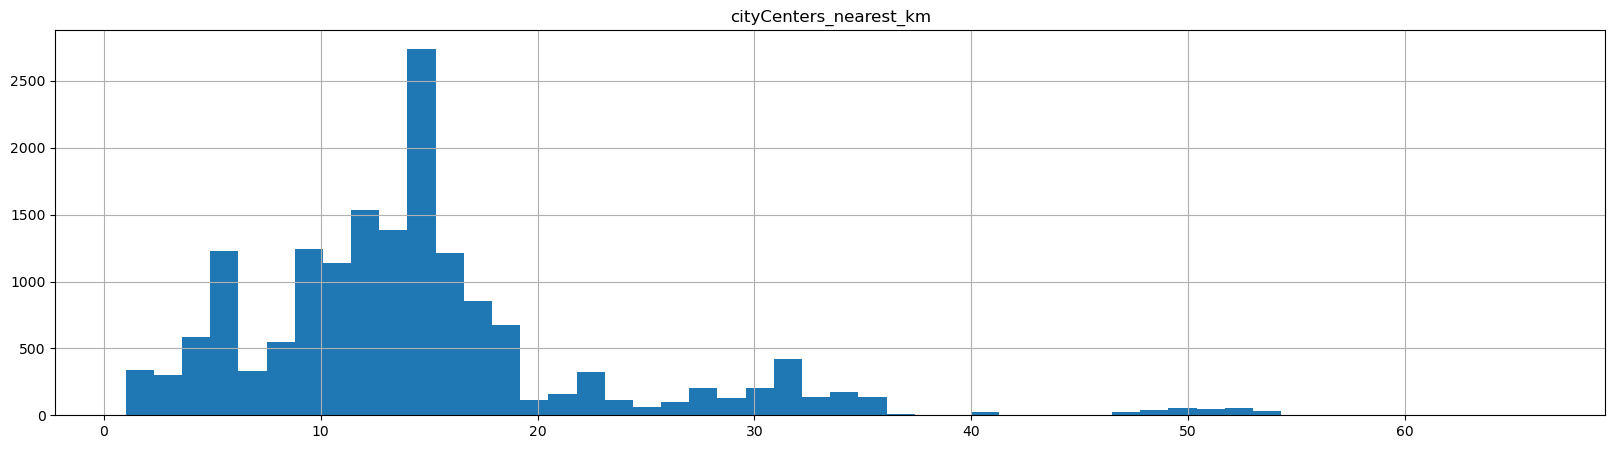

In [76]:
#исследование расстояния до центра(в км)
data.hist('cityCenters_nearest_km', figsize=(20,5), bins=50)

In [77]:
data['cityCenters_nearest_km'].describe(percentiles=[.015, .25, .5, .75, .985]).round(2)

count    16690.00
mean        14.56
std          8.57
min          1.00
1.5%         2.00
25%         10.00
50%         13.00
75%         16.00
98.5%       47.00
max         66.00
Name: cityCenters_nearest_km, dtype: float64

*Наблюдается участок "оторванный" от остальных в радиусе от 45 до 55 км от центра. Максимальное расстояние - 66км.*

In [78]:
data.loc[data['cityCenters_nearest_km'] > 45, 'locality_name'].value_counts()

Ломоносов      121
Кронштадт       95
Петергоф        23
Зеленогорск     19
Молодёжное       5
Name: locality_name, dtype: int64

*На таком расстоянии находятся крупные административные районы Санкт-Петербурга. Учитывая размеры Ленинградской области, можно предположить, что максимальное расстояние от центра СПб может быть гораздо большим. Следует вывод, что расстояние до центра указано только для СПб - это объясняет большое количетво пропусков в данных об отдалённости от центра и аэропорта.*

*Выделять типичные и нетипичные значения в данной ситуации неправильно, т.к. некоторые районы ЛО находятся гораздо ближе к центру города, чем городские районы, для которых указано расстояние. Например: Мурино и Кудрово гораздо ближе у центру чем Кронштадт или Зеленогорск.*

*Можно отметить, что большинство предложений расположено в радиусе от 10 до 16 км. Однако, в этот радиус уже могут попадать крупные жилые кварталы новостроек в пригородах, для которых нет данных по расстоянию.*


array([[<AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'floor'}>]], dtype=object)

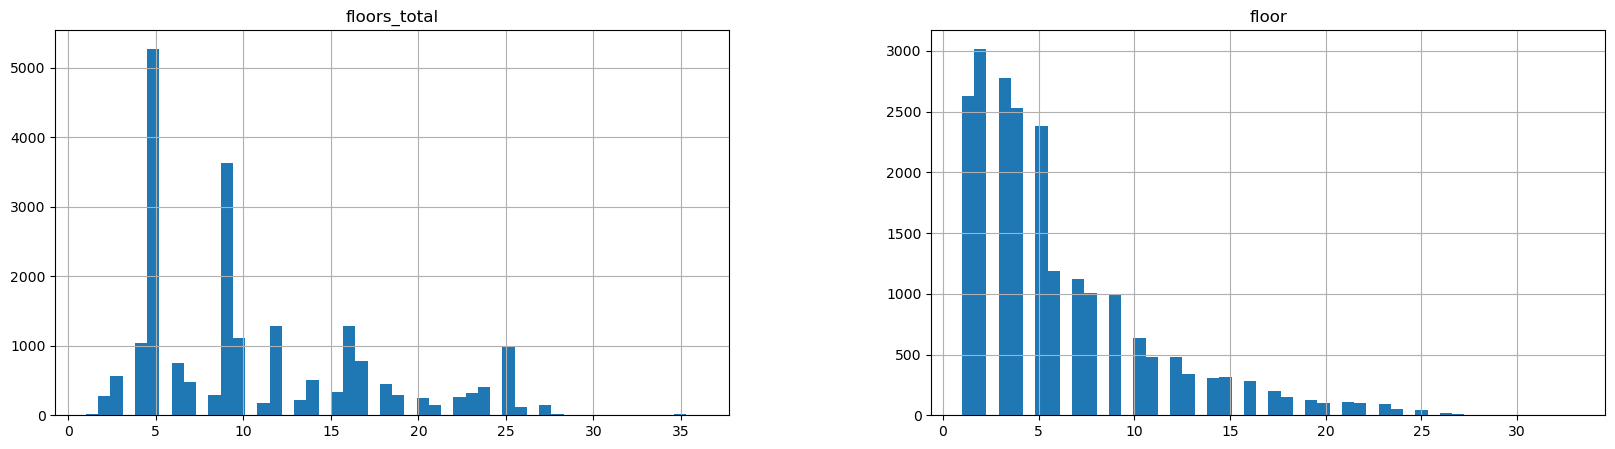

In [79]:
#исследование этажей
data.hist(column = ['floors_total', 'floor'], figsize=(20,5), bins=50)

In [80]:
data.loc[:, ['floors_total', 'floor']].describe().round()

,floors_total,floor
count,21499.0,21499.0
mean,11.0,6.0
std,7.0,5.0
min,1.0,1.0
25%,5.0,2.0
50%,9.0,4.0
75%,16.0,8.0
max,36.0,33.0


*Большинство квартир расположены в домах с этажностью от 5 до 16, максимальное - в девятиэтажках.*

*Большинство объявлений о кратирах на этажах со 2 по 8, максимальное - на 4 этаже.*

In [81]:
another_floor_part = len(data.loc[data['floor_type'] == 'другой']) / len(data)
first_floor_part = len(data.loc[data['floor_type'] == 'первый']) / len(data)
last_floor_part = len(data.loc[data['floor_type'] == 'последний']) / len(data)
print('Доля средних этажей', round(another_floor_part, 2))
print('Доля первых этажей',  round(first_floor_part, 2))
print('Доля последних этажей',  round(last_floor_part, 2))

Доля средних этажей 0.74
Доля первых этажей 0.12
Доля последних этажей 0.14


array([[<AxesSubplot:title={'center':'airports_nearest_km'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest_km'}>],
       [<AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>]], dtype=object)

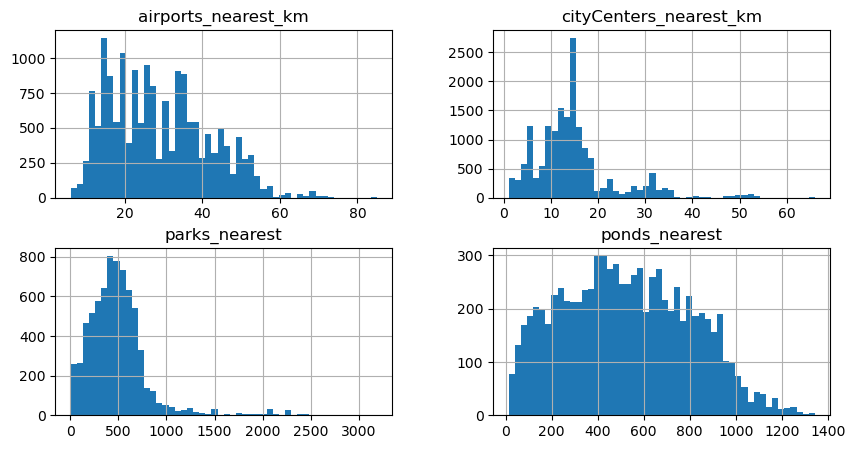

In [82]:
#исследование расстояний до аэропорта, центра города, ближайшего парка и пруда
data.hist(column = ['airports_nearest_km', 'cityCenters_nearest_km', 'parks_nearest', 'ponds_nearest'], figsize=(10,5), bins=50)

In [83]:
data.loc[:, ['airports_nearest_km', 'cityCenters_nearest_km', 'parks_nearest', 'ponds_nearest']].describe().round(0)

,airports_nearest_km,cityCenters_nearest_km,parks_nearest,ponds_nearest
count,16671.0,16690.0,7247.0,8128.0
mean,29.0,15.0,495.0,526.0
std,13.0,9.0,342.0,277.0
min,6.0,1.0,1.0,13.0
25%,18.0,10.0,292.0,306.0
50%,27.0,13.0,457.0,512.0
75%,37.0,16.0,616.0,736.0
max,85.0,66.0,3190.0,1344.0


*Большинство квартир находятся в радиусе:*
* от аэропорта в 18-37 км;
* от центра города в 10-16 км.

*Для большинства квартир пруды и парки находятся на расстоянии от 300 до 600 м.*

*Для части населённых пунктов нет данных по этим величинам.*


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21499 entries, 0 to 23697
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            21499 non-null  int64         
 1   last_price              21499 non-null  float64       
 2   total_area              21499 non-null  float64       
 3   first_day_exposition    21499 non-null  datetime64[ns]
 4   rooms                   21499 non-null  int64         
 5   ceiling_height          21499 non-null  float64       
 6   floors_total            21499 non-null  int32         
 7   living_area             21499 non-null  float64       
 8   floor                   21499 non-null  int64         
 9   is_apartment            21499 non-null  bool          
 10  studio                  21499 non-null  bool          
 11  open_plan               21499 non-null  bool          
 12  kitchen_area            21499 non-null  float6

array([[<AxesSubplot:title={'center':'weekday_exp'}>,
        <AxesSubplot:title={'center':'month_exp'}>],
       [<AxesSubplot:title={'center':'year_exp'}>,
        <AxesSubplot:title={'center':'days_exposition'}>]], dtype=object)

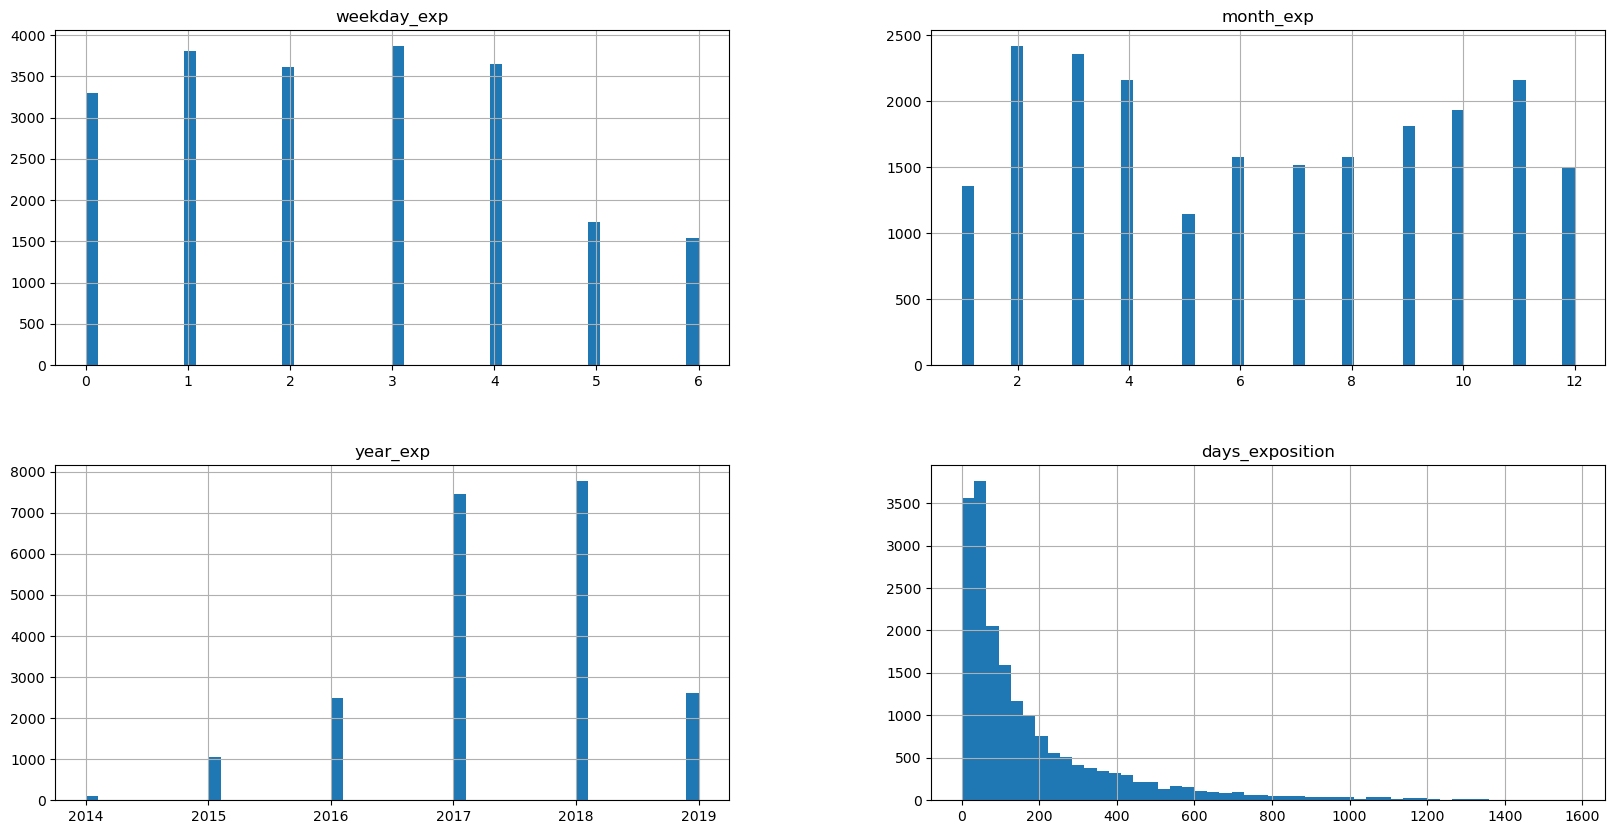

In [85]:
#день, месяц публикации объявления
data.hist(column = ['weekday_exp', 'month_exp', 'year_exp', 'days_exposition'], figsize=(20,10), bins=50)

*Большинство сделок проводилось в рабочие дни.*

*Самые активные по размещениям объявлений месяца: с февраля по апрель. С августа по ноябрь виден плавный рост активности. Спады в декабре, анваре и летних месяцах.*

*Наибольшее количество объявлений в исходных данных представлено за 2017 и 2018 года.* 

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Отличные исследования праметров!  но давай перепроверим после восстановления датафрейма)

In [86]:
data['days_exposition'].describe().round()

count    18682.0
mean       179.0
std        218.0
min          1.0
25%         45.0
50%         95.0
75%        229.0
max       1580.0
Name: days_exposition, dtype: float64

*Большая часть объявлений находились на экспозиции от 45 до 229 дня.*

*Быстрые продажи: от 1 до 44 дней.*

*Необычно долгие: от 300 до 1580 дней.*

### Проведите исследовательский анализ данных

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='living_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='living_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='living_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='kitchen_area', ylabel='living_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='living_area'>],
       [<AxesSubplot:xlabel='last_pric

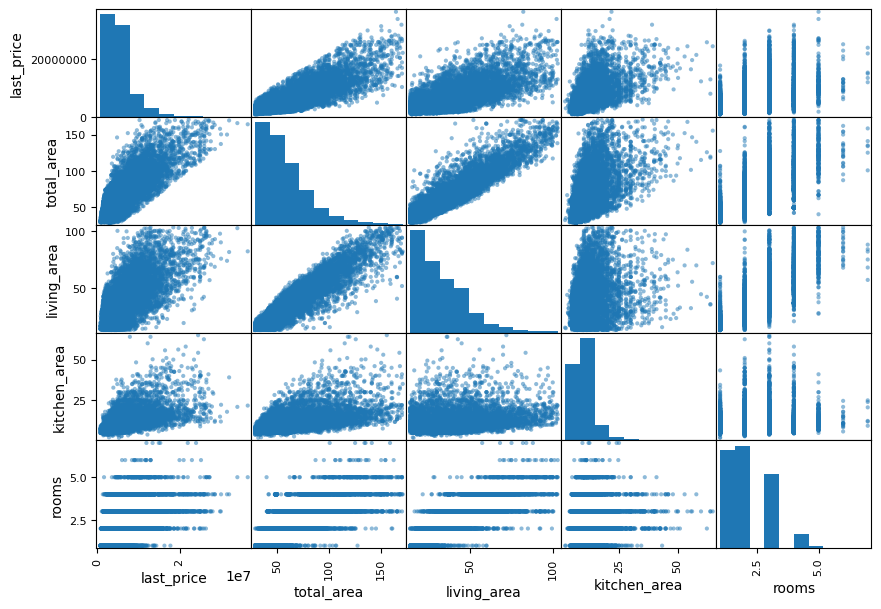

In [87]:
data_plot = data.loc[:, ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms']]
pd.plotting.scatter_matrix(data_plot, diagonal='hist', alpha=0.5, figsize=(10,7))

<AxesSubplot:xlabel='last_price'>

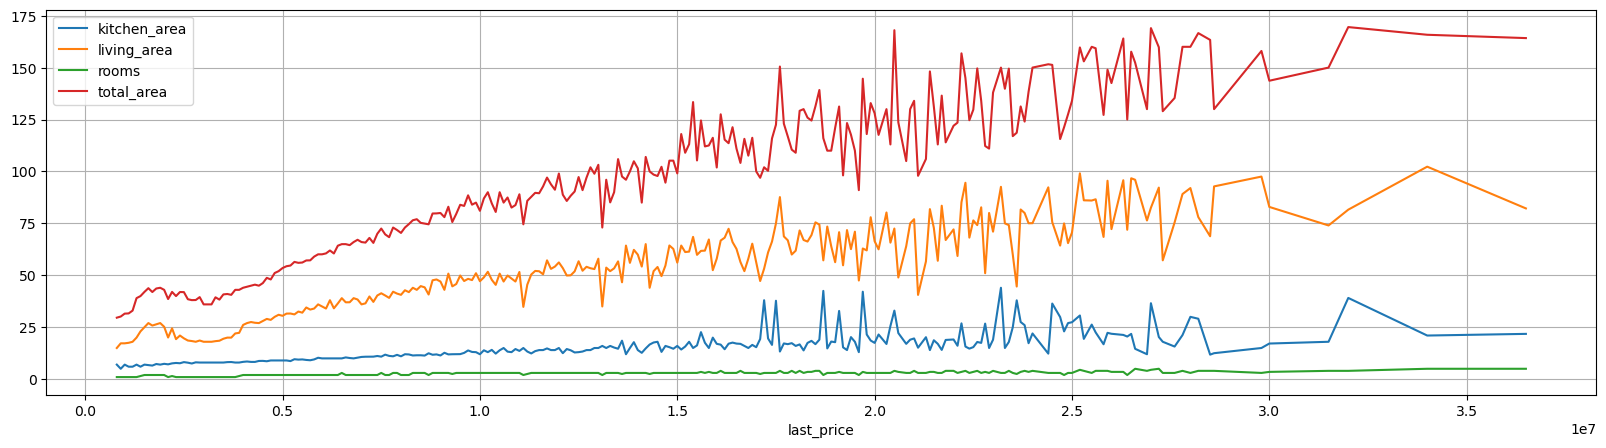

In [88]:
data_price = data
data_price['last_price'] = data_price['last_price'].round(-5) #округления цен для облегчения восприятия графика
data_price.pivot_table(index='last_price', values=['total_area', 'living_area', 'kitchen_area', 'rooms'], aggfunc='median').plot(grid=True, figsize=(20, 5))

График зависимости цены от показателей площади можно разделить на 2 части: дешевле ~3,5млн руб. и дороже.

В ценовом диапазоне от 1,8 до 3,5 млн наблюдается уменьшение площади и количества комнат с ростом цены. После 3,5 млн с увеличением этих факторов практически линейно растёт и цена, разброс и снижение роста появляются в ценовом диапазоне выше 8 млн руб., однако, тенденция сохраняется. Свыше 270 млн зависимость теряется.

Такой эффект вероятно дает большое количество типовых 2-х комнатных хрущевок площадью 40-45 м2 в изношенных домах, особенно в небольших населённых пунктах - это самое непривлекательное жилье. Однокомнатные квартиры с меньшей площадью, но в новостройках или центре будут стоить дороже. Таким образом, искривление зависимости цены от площади обуслевлено другими факторами: вероятно годом постройки и планировкой, либо локацией. Этими же факторами возможно объясняется и увеличение разброса цен квартир, площадью более 70м2.

Дополнительным фактором увеличесния разброса после цены 8 млн является относительно низкое количество предложений и повышение их уникальности - типовое жилье с общей площадью более 70 м2, т.е. 4-х комнатные квартиры, встречаются значительно реже, чем 2-х и 3-х комнатные. Соответственно, в этом сегменте увеличивается роль нетипового жилья, где большую роль играет степень износа и локация.

Зависимость цены от площади кухни практически линейна - c увеличением кухни цена растёт

Наибольшее влияние оказывает общая площадь. В диапозоне цен до 6 млн, графики роста общей и жилой площади практически параллельны, далее жилая площадь начинает оказывать чуть меньшее влияние.

Диапазоны изменения площади кухни и количества комнат невилики, поэтому их влияние заметно в меньшей степени.


<AxesSubplot:xlabel='last_price'>

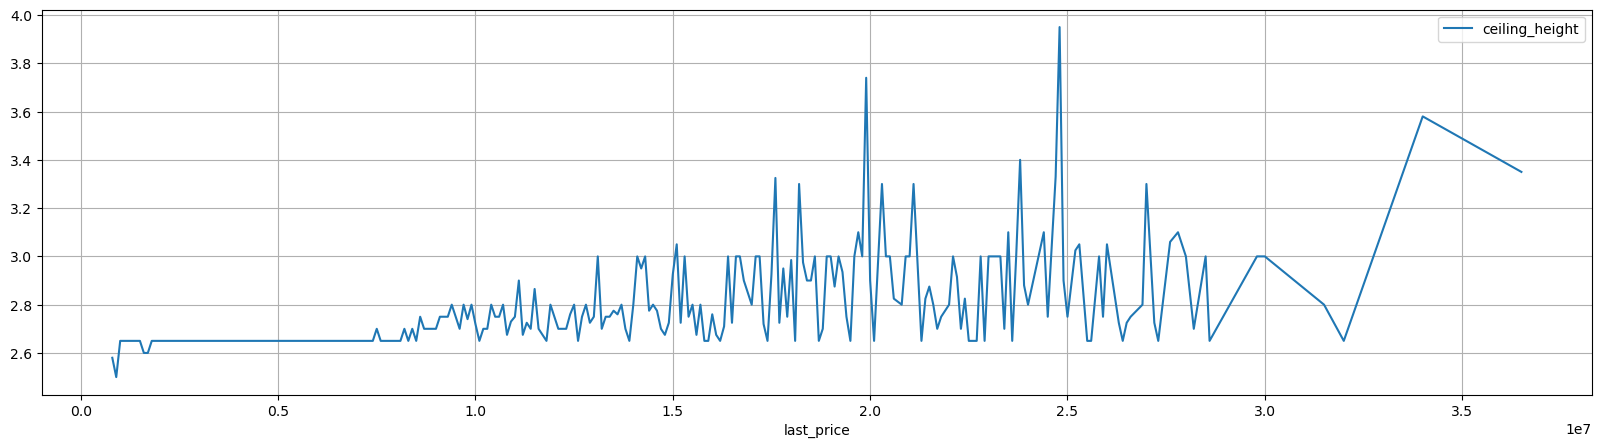

In [89]:
data_price.pivot_table(index='last_price', values='ceiling_height', aggfunc='median').plot(grid=True, figsize=(20, 5))

<AxesSubplot:xlabel='last_price', ylabel='ceiling_height'>

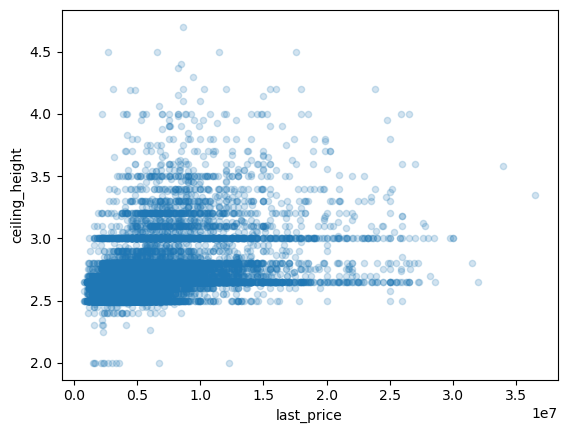

In [90]:
data.plot.scatter(x='last_price', y='ceiling_height', alpha=0.2)

*Основная масса квартир с высотой потолков от 2.5 до 3м расположена в ценовом сегменте от 2 до 8 млн руб.*

*После цены в 8 млн количество объявлений с потолками ниже 2,65 заметно снижается.*

*Квартиры с высотой потолков выше 2,65 практически равномерно распределены по ценовому диапазону от 4 до 12 млн. Однако, в этом ценовом сегменте также присутствуют квартиры с потолками 2,65, поэтому на цену могут влиять и дргуие факторы. Зависимость цены от высоты потолка не очевидна.*

<AxesSubplot:xlabel='last_price'>

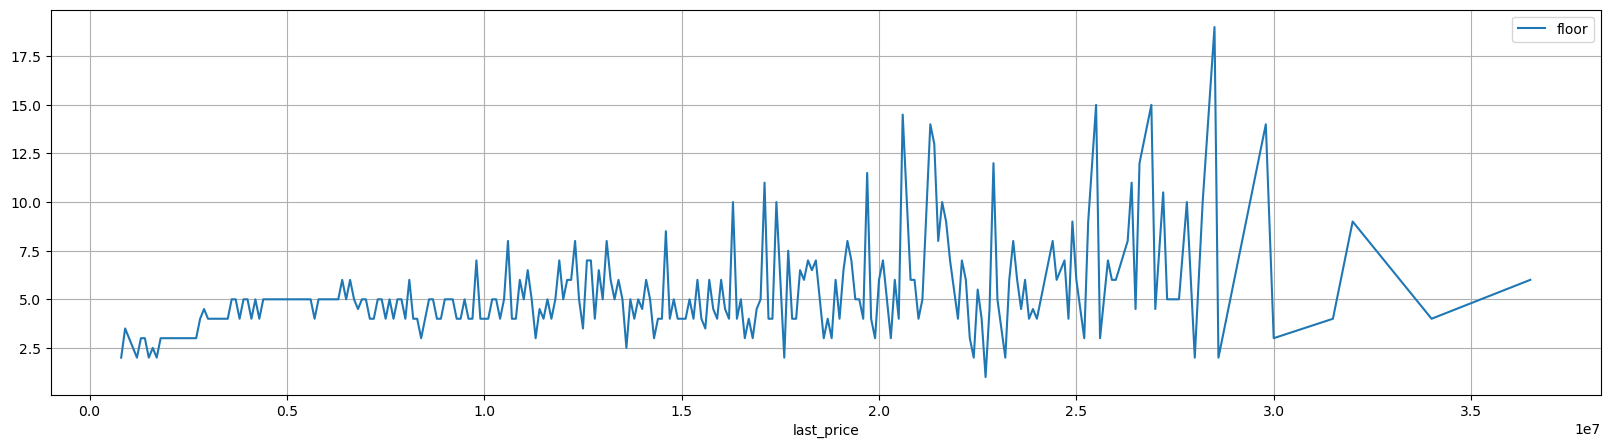

In [91]:
data_price.pivot_table(index='last_price', values='floor', aggfunc='median').plot(grid=True, figsize=(20, 5))

<AxesSubplot:xlabel='last_price', ylabel='floor'>

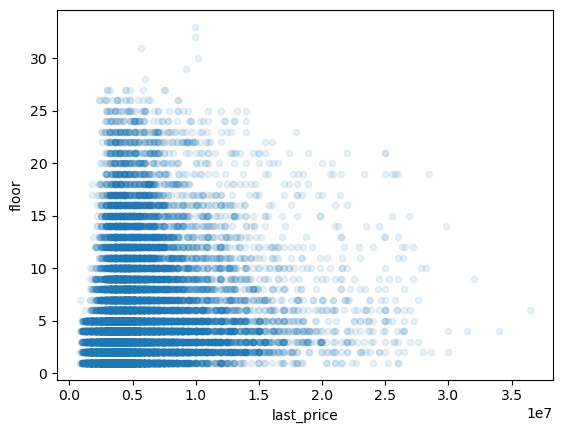

In [92]:
data.plot.scatter(x='last_price', y='floor', alpha=0.1)

*Характерного влияния этажа на цену не обнаружено. Самые дешёвые предложения с большей вероятностью будут до 3-его этажа. основонаоя масса квартир стоимостью от 3 до 9 млн руб. расположена на этажах с 4 по 5. В ценовом сегменте свыше 8 млн доля вкартир на 1 этаже снижается.*

,last_price
floor_type,
другой,4800000.0
первый,4000000.0
последний,4300000.0


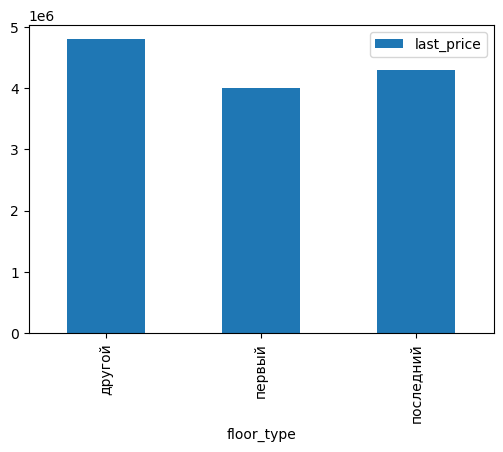

In [93]:
data.pivot_table(index='floor_type', values='last_price', aggfunc='median').plot.bar(figsize=(6,4))
data.pivot_table(index='floor_type', values='last_price', aggfunc='median')

*Квартиры на "средних" этажах дороже остальных - 4,8млн. В сравнении квартир на первом и последнем этаже - первый этаж окажется дешевле, 4 и 4,3 млн соответственно.*

,last_price
weekday_exp,
0,4600000.0
1,4800000.0
2,4700000.0
3,4600000.0
4,4600000.0
5,4600000.0
6,4600000.0


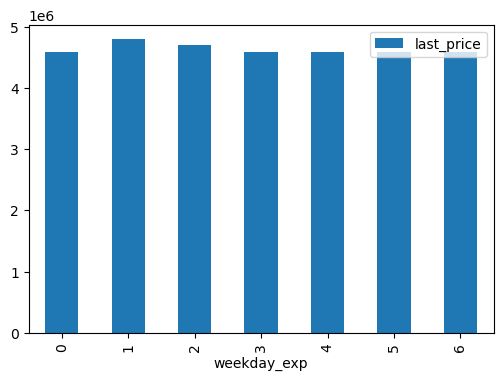

In [94]:
#день недели, месяц, год
data.pivot_table(index='weekday_exp', values='last_price', aggfunc='median').plot.bar(figsize=(6,4))
data.pivot_table(index='weekday_exp', values='last_price', aggfunc='median')

*Наиболее частая цена размещаемых квартир в течение недели - 4,6 млн. Чуть больше стоимость во вт и ср - 4,8 и 4,7млн соответственно.*

,last_price
month_exp,
1,4600000.0
2,4600000.0
3,4700000.0
4,4800000.0
5,4500000.0
6,4400000.0
7,4600000.0
8,4600000.0
9,4700000.0


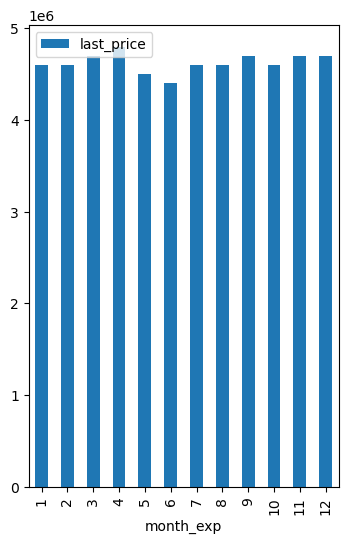

In [95]:
data.pivot_table(index='month_exp', values='last_price', aggfunc='median').plot.bar(figsize=(4,6))
data.pivot_table(index='month_exp', values='last_price', aggfunc='median')

*В январе и феврале, июле и августе, а также в октябре наблюдается средняя стоимость квартир в размещаемых объявлениях - 4,6 млн. Спад до 4,4 и 4,5 млн наблюдался июне и ; до 5,2 млн в мае и июне. Повышение цены в марте, сентябре и ноябре и декабре - 4,7 млн.*

,last_price
year_exp,
2014,7300000.0
2015,5200000.0
2016,4500000.0
2017,4500000.0
2018,4600000.0
2019,5100000.0


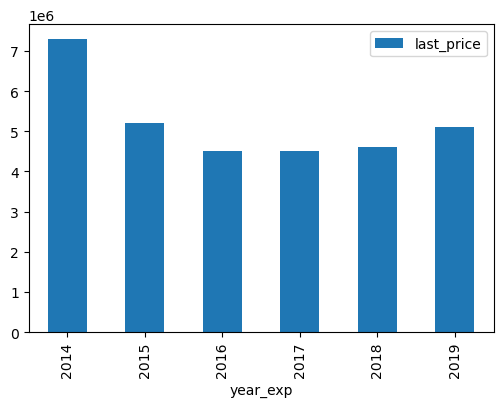

In [96]:
data.pivot_table(index='year_exp', values='last_price', aggfunc='median').plot.bar(figsize=(6,4))
data.pivot_table(index='year_exp', values='last_price', aggfunc='median')

*Самые дорогие квартиры размещались в 2014 году - до 7,5млн. В 2015 цена снижается до 5,3 млн. С 2016 по 2018 год средняя цена 4,5 млн. В 2019 снова рост - до 5млн.*

In [97]:
popular_locality = data['locality_name'].value_counts().head(10).index.tolist()
data_popular_locality = data.loc[data['locality_name'].isin(popular_locality), ['locality_name', 'meter_price']].groupby('locality_name').median().reset_index().sort_values('meter_price', ascending=False)
data_popular_locality

,locality_name,meter_price
8,Санкт-Петербург,103299.930
7,Пушкин,99706.740
4,Кудрово,94507.530
6,Парголово,90909.090
5,Мурино,83484.845
9,Шушары,75757.560
3,Колпино,74689.875
2,Гатчина,67796.610
0,Всеволожск,65594.695
1,Выборг,58233.005


*Самый дорогой кв. м жилья в Санкт-Петербурге, самый дешевый - в Красном Селе.*

cityCenters_nearest_km
1.0     10000000.0
2.0      9000000.0
3.0      8000000.0
4.0      8500000.0
5.0      8500000.0
6.0      8000000.0
7.0      6900000.0
8.0      7300000.0
9.0      5400000.0
10.0     5000000.0
11.0     5000000.0
12.0     5000000.0
13.0     5200000.0
14.0     4900000.0
15.0     4900000.0
16.0     4800000.0
17.0     4600000.0
18.0     4350000.0
19.0     4500000.0
20.0     5900000.0
21.0     5300000.0
22.0     4950000.0
23.0     4600000.0
24.0     3600000.0
25.0     4100000.0
26.0     3850000.0
27.0     8300000.0
28.0     5000000.0
29.0     4550000.0
Name: last_price, dtype: float64

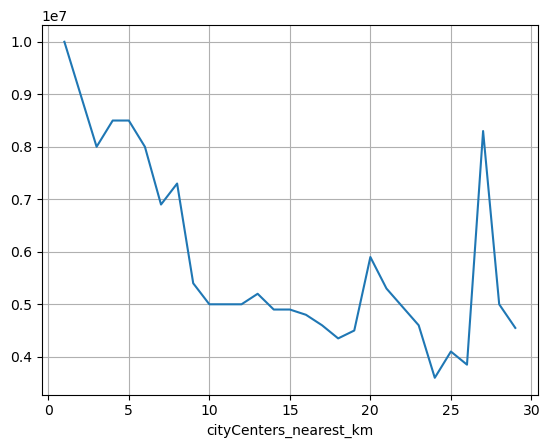

In [98]:
data_spb = data.loc[data['locality_name'] == 'Санкт-Петербург']
data_spb.groupby('cityCenters_nearest_km')['last_price'].median().plot(grid=True)
data_spb.groupby('cityCenters_nearest_km')['last_price'].median()


*Медианное значение цены на жилье в радиусе от 1 до 11км резко падает от 9,4 до 5млн с удалением от центра.*

*В радиусе от 11 до 18км падение цены замедляется. Тенденция на понижение цены просматривается вплоть до 3,9млн в радиусе 23км.*

*Однако в этом радиусе наблюдаются 3 пика:*
* небольшой скачек в радиусе 13км - до 5,2млн; 
* резкий пик на 20км - до 5,9млн;
* ещё более резкий взлёт на 27км - до 6,5млн.

*Далее цена снижается, но всего до 5-4,5 млн.*

## Общий вывод

### Качество исходных данных, меры заполнению пропусков, очистке и исправлениях. 

**В рамках исследоваия данных от выявлены пропуски в значениях:**
* Высота потолков;
* Апартаменты;>
* Общее количество этажей;
* Количество балконов;
* Площадь кухни и жилая площадь;
* Название населённого пункта;
* Количество парков и прудов в радиусе 3км;
* Расстояния до ближайших аэропорта, центра города, парка и пруда;
* Количество дней размещения.

**Вероятные причины отсутсвия данных:**

1. незаполнение данных подателями объявлений по невнимательности или незнанию точных данных:
    * высоты потолков;
    * общего количества этажей;
    * площадей кухни и жилой площади;
    * количества парков и прудов в радиусе 3км;
	

2. отметка апартаменты вероятно не проставлена для квартир, не являющихся таковыми;
3. количество балконов скорее всего не указано при их отсутствии.

Отсутствие названия населённого пункта вероятно обусловлено ошибкой при вводе данных. Скорее всего используется картографичсекий сервис, который не "разобрал" введённое подателем объявления значение. Если местоположение предустанавливается в объявление по геоопределению в момент сесии размещения и податель не ввёл населённый пункт, возможно данные не записались. Объём таких данных составляет 0,2% от общей массы - они исключены из исследования.

В названиях населённых пунктов также обнаружены различные написания одного и того же пункта. Обнаружен 51 дубль. Оснавная причина: "е/ё" в слове "посёлок", а также разные написания статуса, пример "городской посёлок" и "посёлок городского типа". 

Отсутствие расстояния до ближайших аэропорта, центра города, парка и пруда - данные рассчитываются автоматически по координатам дома. В результате анализа появилась теория - данные не рассчитаны для объектов ЛО:
* 23% нерассчитанных расстояний до ближайщих аэропорта и центра города;</li>
* 66% нерассчитанных расстояний до ближайщих прудов и парков.</li>

Пропусков в данных о ближайших прудах и парках значительно превышает пропуски данных об аэропортах и центре. Логично предположить, для этих данных стоит лимит по отдалению от дома и для превышающих его расстояний данные не записываются, т.к. уже не должны представлять интерес для потенциального покупателя. В небольших населенных пунктах может может просто не быть окультуренных парков и прудов. Возможно также, что не все парки и пруды содержатся в используемом сервисе.

Скорее всего причина пропусков в количестве дней размещения - объявление ещё не снято или опубликовано и снято в один и тот же день - нудевые значения отсутствуют.

**Рекомендации:**
* проверить и изменить при необходимости форму заполнения данных об апартаментах и балконах, чтобы можно было получить однозначное значение: да/нет и количество от 0;
* проверить форму ввода данных от местоположении объекта продажи. Рассмотреть целесообразность рассчета дальности до центра и аэропорта для ближайших объектов ЛО;
* проверить алгоритм расчета расстояний до значимых объектов: аэропортов, парков и пр.;
* проверить алгоритм рассчета времени публикации.

**Для исследования были произведено заполнение отсутствующих данных:**

* высота потолков - на самое распространённое значение;
* апартаменты - на "нет";
* количество балконов - на 0;
* площадь кухни - на наиболее частый % от общей площади квартиры с учетом студий и свободной планировки;
* жилая площадь - на наиболее частый % от общей площади квартиры с учетом количества комнат;
* количество парков и прудов в радиусе 3км - на 0.

**Выявлены ошибки:**
* у порядка 200 объектов обнаружены суммы жилой площади и кухни равные или превышающие общую площадь(данные исключены из исследования);
* обнаружены малоправдоподобные значения высоты потолков - менее 2х метров и более 6 - менее 1% от общего количества (данные исключены из исследования);
* у 2 домов указана несуществующая для данного региона этажность - 52 и 60;
* для одного объекта установилось расстояние до аэропорта равное 0 (исключена из исследования).


**Из исследования исключены данные:**
* о студиях и квартирах со свободной планировкой - для них отсутствуют параметры внутренних площадей и количества комнат;
* о квартирах с потолками выше 5 метров - они могут быть многоэтажными, что искажает информацию об общей и жилой площадях;

Рекомендовано сделать автопроверку жилой площади и кухни в сравнении с общей площадью для формы объявления.

### Результаты исследования данных 

Как нетипичные исключены данные об:
* общая площадь менее 29 и более 170,7 м2;
* цену за кв.м менее 27 и более 223 тыс руб.

Исследование показало:

Большинство квартир имеет следующие значения площади и цены:

* общую площадь от 40,2 до 69,8 м2;
* жилую площадь от 18,8 до 42,2 м2;
* площадь кухни от 7,1 до 11,8 м2;
* от 1 до 3 комнат;
* высоту потолков от 2,6 до 2,7м;
* общую цену от 3,5 до 6,7 млн руб.;
* цену за кв.м от 76 до 114 тыс руб.

Параметры этажей:
* большинство квартир расположены в домах с этажностью от 5 до 16, максимальное - в девятиэтажках;
* большинство объявлений о кратирах на этажах со 2 по 8, максимальное - на 5 этаже;
* процент квартир на средних этажах 78%;
* процент квартир на первых этажей 10%;
* процент квартир на последних этажей 12%.

Большинство квартир находятся в радиусе:
* от аэропорта в 18-37 км;
* от центра города в 10-16 км.

Для большинства квартир пруды и парки находятся на расстоянии ~500 м.

**Календарные параметры и скорость продаж**

Большинство сделок проводилось в рабочие дни.

Самые активные по размещениям объявлений месяца: с февраля по апрель. С августа по ноябрь виден плавный рост активности. Спады в декабре, анваре и летних месяцах.

Наибольшее количество объявлений в исходных данных представлено за 2017 и 2018 года.

Большая часть объявлений находились на экспозиции от 47 до 197 дня.

Быстрые продажи: от 1 до 44 дней.

Необычно долгие продажи: от 300 до 1580 дней.

**Зависимость цены от показателей площади**

График зависимости цены от показателей площади можно разделить на 2 части: дешевле ~3,5млн руб. и дороже.

В ценовом диапазоне от 1,8 до 3,5 млн наблюдается уменьшение площади и количества комнат с ростом цены. После 3,5 млн с увеличением этих факторов практически линейно растёт и цена, разброс и снижение роста появляются в ценовом диапазоне выше 8 млн руб., однако, тенденция сохраняется. Свыше 270 млн зависимость теряется.

Такой эффект вероятно дает большое количество типовых 2-х комнатных хрущевок площадью 40-45 м2 в изношенных домах, особенно в небольших населённых пунктах - это самое непривлекательное жилье. Однокомнатные квартиры с меньшей площадью, но в новостройках или центре будут стоить дороже. Таким образом, искривление зависимости цены от площади обуслевлено другими факторами: вероятно годом постройки и планировкой, либо локацией. Этими же факторами возможно объясняется и увеличение разброса цен квартир, площадью более 70м2.

Дополнительным фактором увеличесния разброса после цены 8 млн является относительно низкое количество предложений и повышение их уникальности - типовое жилье с общей площадью более 70 м2, т.е. 4-х комнатные квартиры, встречаются значительно реже, чем 2-х и 3-х комнатные. Соответственно, в этом сегменте увеличивается роль нетипового жилья, где большую роль играет степень износа и локация.

Зависимость цены от площади кухни практически линейна - c увеличением кухни цена растёт.

Наибольшее влияние оказывает общая площадь. В диапозоне цен до 6 млн, графики роста общей и жилой площади практически параллельны, далее жилая площадь начинает оказывать чуть меньшее влияние.

Диапазоны изменения площади кухни и количества комнат невилики, поэтому их влияние заметно в меньшей степени.
	
**Влияние высоты потолка на стоимость квартиры**

Основная масса квартир с высотой потолков от 2.5 до 3м расположена в ценовом сегменте от 2 до 8 млн руб. После цены в 8 млн количество объявлений с потолками ниже 2,65 заметно снижается. Квартиры с высотой потолков выше 2,65 практически равномерно распределены по ценовому диапазону от 4 до 12 млн. Однако, в этом ценовом сегменте также присутствуют квартиры с потолками 2,65, поэтому на цену могут влиять и дргуие факторы. Зависимость цены от высоты потолка не очевидна.	

**Влияние этажа на стоимость квартиры**

Характерного влияния этажа на цену не обнаружено. Самые дешёвые предложения с большей вероятностью будут до 3-его этажа. основонаоя масса квартир стоимостью от 3 до 9 млн руб. расположена на этажах с 4 по 5. В ценовом сегменте свыше 8 млн доля вкартир на 1 этаже снижается.

Квартиры на "средних" этажах дороже остальных - 4,8млн. В сравнении квартир на первом и последнем этаже - первый этаж окажется дешевле, 4 и 4,3 млн соответственно.

**Влияние календарных факторов на стоимость квартиры**
    
Наиболее частая цена размещаемых квартир в течение недели - 4,6 млн. Чуть больше стоимость во вт и ср - 4,8 и 4,7млн соответственно.
    
В январе и феврале, июле и августе, а также в октябре наблюдается средняя стоимость квартир в размещаемых объявлениях - 4,6 млн. Спад до 4,4 и 4,5 млн наблюдался июне и ; до 5,2 млн в мае и июне. Повышение цены в марте, сентябре и ноябре и декабре - 4,7 млн. Спад цены в летние месяцы можно связать с массовыми отпусками. Ближе к осени покупательская активность восстанавливается, и цены растут. Максимальный рост в ноябре и декабре вероятно обусловлен максимальной активностью в преддверии новогодних каникул, а также, возможно, окончанием налогового периода.

**Влияние локации на цену жилья**

Самый дорогой кв. м жилья в Санкт-Петербурге, самый дешевый - в Красном Селе.
Медианное значение цены на жилье в радиусе от 1 до 11км резко падает от 9,4 до 5млн с удалением от центра.

В радиусе от 11 до 18км падение цены замедляется. Тенденция на понижение цены просматривается вплоть до 3,9млн в радиусе 23км.

Однако в этом радиусе наблюдаются 3 пика:
* небольшой скачек в радиусе 13км - до 5,2млн;
* резкий пик на 20км - до 5,9млн;
* ещё более резкий взлёт на 27км - до 6,5млн.

Далее цена снижается, но всего до 5-4,5 млн.

В исторической части города традиционно высокие цены на жилье. Чем дальше от центра, тем больше становится типовой застройки - небольших квартир в многоквартирных домах. В радиусе до 18 км - предположительно это обветшалые хрущевки неудобной планировки. Пики на отдалённых радиусах могут  означать квартиры в новостройках. Таким образом вероятный вывод, что характеристики жилого фонда - износ и планировка больше влияют на цену, нежели удаление от центра города.